## Setup

In [4]:
import os
import re
from datetime import datetime
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for plots
plt.style.use('default')
sns.set_theme(style='whitegrid')
plt.rcParams['figure.figsize'] = [12, 6]

# Set pandas display options
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/jstenger/Documents/repos/kalshi-research/venv/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3550, in run_code
  File "/var/folders/mh/5p7rby_53kd1nj318h5rhkg80000gn/T/ipykernel_1509/3785427608.py", line 4, in <module>
    import pandas as pd
ModuleNotFoundError: No module named 'pandas'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/jstenger/Documents/repos/kalshi-research/venv/lib/python3.9/site-packages/pygments/styles/__init__.py", line 45, in get_style_by_name
ModuleNotFoundError: No module named 'pygments.styles.default'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/jstenger/Documents/repos/kalshi-research/venv/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2144, in showtraceback
  File "/Users/jstenger/Documents/repos/kalshi-research/venv/lib/p

In [ ]:
INAUGURATION_DATE = datetime(2025, 1, 20)
CONTEXT_WINDOW = 200 # words to display for context

In [ ]:
SEARCH_PHRASES = {
    'Melania': r'\b(?:\w+-)*(?:melania|melanias|melania\'s|melanias\')(?:-\w+)*(?=\W|$)[.,!?;:]*',
    'Newscum': r'\b(?:\w+-)*(?:newscum|newscums|newscum\'s|newscums\')(?:-\w+)*(?=\W|$)[.,!?;:]*',
    'Epstein': r'\b(?:\w+-)*(?:epstein|epsteins|epstein\'s|epsteins\')(?:-\w+)*(?=\W|$)[.,!?;:]*',
    'Sleepy Joe': r'\b(?:\w+-)*(?:sleepy\s+joe|sleepy\s+joes|sleepy\s+joe\'s|sleepy\s+joes\')(?:-\w+)*(?=\W|$)[.,!?;:]*',
    'Football': r'\b(?:\w+-)*(?:football|footballs|football\'s|footballs\')(?:-\w+)*(?=\W|$)[.,!?;:]*',
    'Nobel Prize': r'\b(?:\w+-)*(?:nobel\s+prize|nobel\s+prizes|nobel\s+prize\'s|nobel\s+prizes\'|peace\s+prize|peace\s+prizes|peace\s+prize\'s|peace\s+prizes\')(?:-\w+)*(?=\W|$)[.,!?;:]*',
    'Cracker Barrel': r'\b(?:\w+-)*(?:cracker\s+barrel|cracker\s+barrels|cracker\s+barrel\'s|cracker\s+barrels\')(?:-\w+)*(?=\W|$)[.,!?;:]*',
    'TikTok': r'\b(?:\w+-)*(?:tiktok|tiktoks|tiktok\'s|tiktoks\')(?:-\w+)*(?=\W|$)[.,!?;:]*',
    'Marijuana': r'\b(?:\w+-)*(?:marijuana|marijuanas|marijuana\'s|marijuanas\'|weed|weeds|weed\'s|weeds\'|cannabis|cannabis\'s)(?:-\w+)*(?=\W|$)[.,!?;:]*',
    'UFC': r'\b(?:\w+-)*(?:ufc|ufcs|ufc\'s|ufcs\')(?:-\w+)*(?=\W|$)[.,!?;:]*',
    'Barack Hussein Obama': r'\b(?:\w+-)*(?:barack\s+hussein\s+obama|barack\s+hussein\s+obamas|barack\s+hussein\s+obama\'s|barack\s+hussein\s+obamas\')(?:-\w+)*(?=\W|$)[.,!?;:]*',
    'Predict': r'\b(?:\w+-)*(?:predict|predicts|predict\'s|predicts\'|prediction|predictions|prediction\'s|predictions\')(?:-\w+)*(?=\W|$)[.,!?;:]*',
    'Ghislaine': r'\b(?:\w+-)*(?:ghislaine|ghislaines|ghislaine\'s|ghislaines\'|maxwell|maxwells|maxwell\'s|maxwells\')(?:-\w+)*(?=\W|$)[.,!?;:]*',
    'Panican': r'\b(?:\w+-)*(?:panican|panicans|panican\'s|panicans\')(?:-\w+)*(?=\W|$)[.,!?;:]*',
    'Buttigieg': r'\b(?:\w+-)*(?:buttigieg|butttigiegs|buttigieg\'s|buttigiegs\')(?:-\w+)*(?=\W|$)[.,!?;:]*',
    'Crypto': r'\b(?:\w+-)*(?:crypto|cryptos|crypto\'s|cryptos\'|bitcoin|bitcoins|bitcoin\'s|bitcoins\')(?:-\w+)*(?=\W|$)[.,!?;:]*',
    'DeSantis': r'\b(?:\w+-)*(?:desantis|desantiss|desantis\'s|desantiss\')(?:-\w+)*(?=\W|$)[.,!?;:]*',
    'Elon': r'\b(?:\w+-)*(?:elon|elons|elon\'s|elons\'|musk|musks|musk\'s|musks\')(?:-\w+)*(?=\W|$)[.,!?;:]*',
    'Ozempic': r'\b(?:\w+-)*(?:fat\s+shot|fat\s+shots|fat\s+shot\'s|fat\s+shots\'|ozempic|ozempics|ozempic\'s|ozempics\')(?:-\w+)*(?=\W|$)[.,!?;:]*',
    'McDonald\'s': r'\b(?:\w+-)*(?:mcdonald\'s|mcdonalds|mcdonald\'ss|mcdonaldss)(?:-\w+)*(?=\W|$)[.,!?;:]*',
    'Slopadopoulos': r'\b(?:\w+-)*(?:slopadopoulos|slopadopouloss|slopadopoulos\'s|slopadopouloss\')(?:-\w+)*(?=\W|$)[.,!?;:]*',
    'Taylor Swift': r'\b(?:\w+-)*(?:taylor\s+swift|taylor\s+swifts|taylor\s+swift\'s|taylor\s+swifts\')(?:-\w+)*(?=\W|$)[.,!?;:]*'
}

In [ ]:
def count_phrases(text, phrases=SEARCH_PHRASES):
    """Count occurrences of phrases in text"""
    counts = {}
    for name, pattern in phrases.items():
        counts[name] = len(re.findall(pattern, text.lower()))
    return counts

def get_date_from_filename(filename):
    """Extract date from filename format YYYY-MM-DD_..."""
    date_str = filename.split('_')[0]
    return datetime.strptime(date_str, '%Y-%m-%d')

def read_transcript(filepath):
    """Read and return transcript text"""
    with open(filepath, 'r', encoding='utf-8') as f:
        return f.read()

def find_phrase_context(text, pattern, window=CONTEXT_WINDOW):
    """Find phrase in text with surrounding context"""
    matches = []
    for match in re.finditer(pattern, text.lower()):
        start = max(0, match.start() - window)
        end = min(len(text), match.end() + window)
        context = text[start:end]
        # Add ellipsis if we're not at the start/end of the text
        if start > 0:
            context = '...' + context
        if end < len(text):
            context = context + '...'
        matches.append(context)
    return matches

def process_directory(directory):
    """Process transcripts from speech and sotu directories only"""
    results = []
    categories_found = set()
    
    for root, _, files in os.walk(directory):
        category = os.path.basename(root)
        categories_found.add(category)
        for file in files:
            if file.endswith('.txt'):
                filepath = os.path.join(root, file)
                try:
                    date = get_date_from_filename(file)
                    text = read_transcript(filepath)
                    counts = count_phrases(text)
                    
                    results.append({
                        'date': date,
                        'file': file,
                        'category': category,
                        'text_length': len(text.split()),
                        'text': text,  # Store full text for context analysis
                        **counts
                    })
                except Exception as e:
                    print(f"Error processing {filepath}: {str(e)}")
    
    print("Categories found in directory:")
    for cat in sorted(categories_found):
        print(f"- {cat}")
    print("\nOnly 'speech' and 'sotu' categories will be analyzed.\n")
    
    return pd.DataFrame(results)


In [ ]:
# Truth Social posts processing (separate 'truth' category)
from IPython.display import display

TRUTH_CSV = "/Users/jstenger/Documents/repos/kalshi-research/data/truth-social/trump_truths_full.csv"

# Load merged Truth Social dataset (created by src/parse_truth_rtf_and_merge.py)
truth_df_raw = pd.read_csv(TRUTH_CSV, dtype=str)

# Normalize columns
truth_df_raw["post_date"] = pd.to_datetime(truth_df_raw["post_date"], errors="coerce")
truth_df_raw = truth_df_raw.dropna(subset=["post_date"]).copy()
truth_df_raw["status_text"] = truth_df_raw["status_text"].fillna("").astype(str)

# Build 'truth' category dataframe using existing helpers:
# - count_phrases(text, phrases=SEARCH_PHRASES)
truth_records = []
for _, row in truth_df_raw.iterrows():
    text = row["status_text"]
    counts = count_phrases(text)  # uses SEARCH_PHRASES defined earlier
    truth_records.append({
        "date": row["post_date"],
        "file": None,
        "category": "truth",
        "text_length": len(text.split()),
        "text": text,
        **counts
    })

truth_df = pd.DataFrame(truth_records).sort_values("date").reset_index(drop=True)

# Preview
display(truth_df.head(1))
print(f"Truth posts processed: {len(truth_df)}")

,date,file,category,text_length,text,Melania,Newscum,Epstein,Sleepy Joe,Football,...,Ghislaine,Panican,Buttigieg,Crypto,DeSantis,Elon,Ozempic,McDonald's,Slopadopoulos,Taylor Swift
0,2024-05-22 23:04:00,None,truth,2,Tickets: https://event.donaldjtrump.com/events/president-donald-j-trump-to-visit-the-south-bronx,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Truth posts processed: 7190


In [ ]:
# Set the category of interest
CATEGORY_OF_INTEREST = "truth"

# Process transcripts
df = process_directory('../data/processed-transcripts')
df = df[df['category'] != 'sotu']
df = df[df['category'] != 'press briefing']
df = df.sort_values('date')


df = pd.concat([df, truth_df], ignore_index=True).sort_values('date').reset_index(drop=True)
print(f"Combined dataset size: {len(df)} records")
df_category = df[df['category'] == CATEGORY_OF_INTEREST]
df_non_category =  df[df['category'] != CATEGORY_OF_INTEREST]


# df_pre = df[~date_mask]
# df_post = df[date_mask]

# # Print dataset statistics
# print("Dataset Statistics:")

# print(f"\n{CATEGORY_OF_INTEREST.title()}s:")
# print(f"Pre-inauguration: {len(df_category_pre)}")
# print(f"Post-inauguration: {len(df_category_post)}")
# print("\nState of the Union:")
# print(f"Total: {len(df_sotu)}")

# print("\nWord Count Statistics:")

# print(f"\n{CATEGORY_OF_INTEREST.title()}s:")
# print(f"Pre-inauguration average length: {df_category_pre['text_length'].mean():.0f} words") 
# print(f"Post-inauguration average length: {df_category_post['text_length'].mean():.0f} words")
# print("\nState of the Union:")
# print(f"Average length: {df_sotu['text_length'].mean():.0f} words")

# print("\nDate Ranges:")

# print(f"\n{CATEGORY_OF_INTEREST.title()}s:")
# print(f"Pre-inauguration: {df_category_pre['date'].min().strftime('%Y-%m-%d')} to {df_category_pre['date'].max().strftime('%Y-%m-%d')}")
# print(f"Post-inauguration: {df_category_post['date'].min().strftime('%Y-%m-%d')} to {df_category_post['date'].max().strftime('%Y-%m-%d')}")


Categories found in directory:
- donald trump vlog
- interview
- interview - pending
- press briefing
- press conference
- press gaggle
- processed-transcripts
- remarks
- sotu
- speech
- uncategorized

Only 'speech' and 'sotu' categories will be analyzed.

Combined dataset size: 7859 records


## Phrase Frequency Over Time

Speeches dropped off dramatically between election day and inauguration day. Non-speech transcripts mostly don't go back as far in time (need to scrape more data)

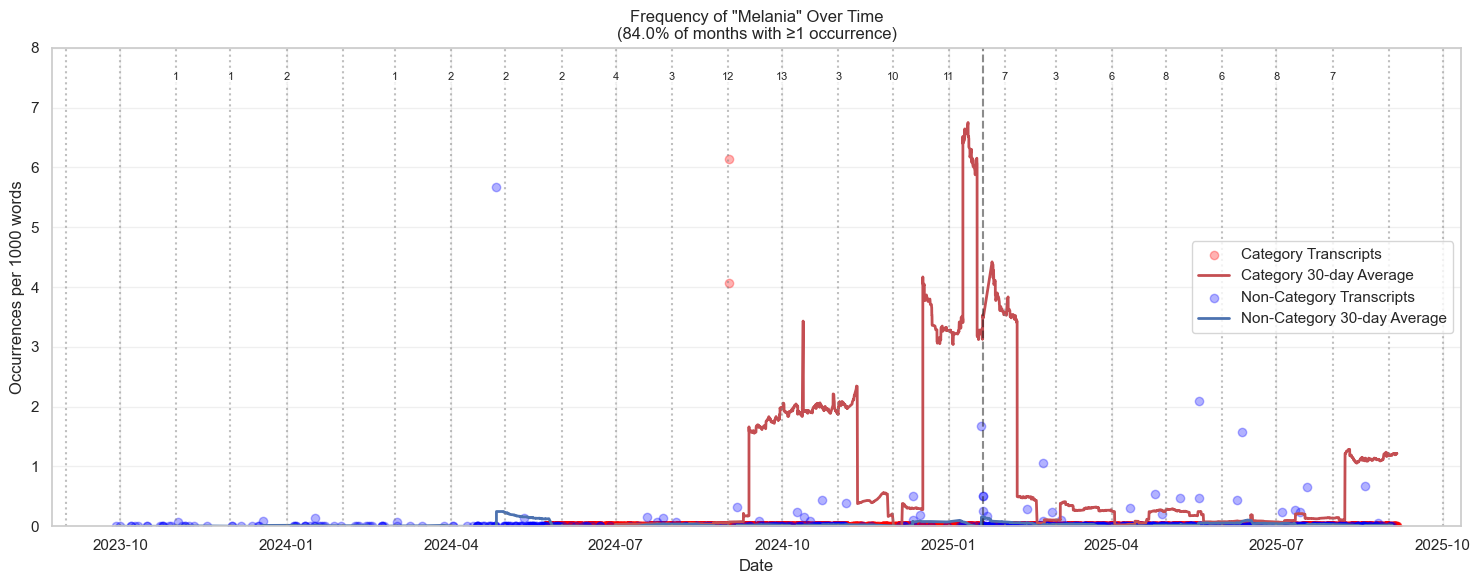

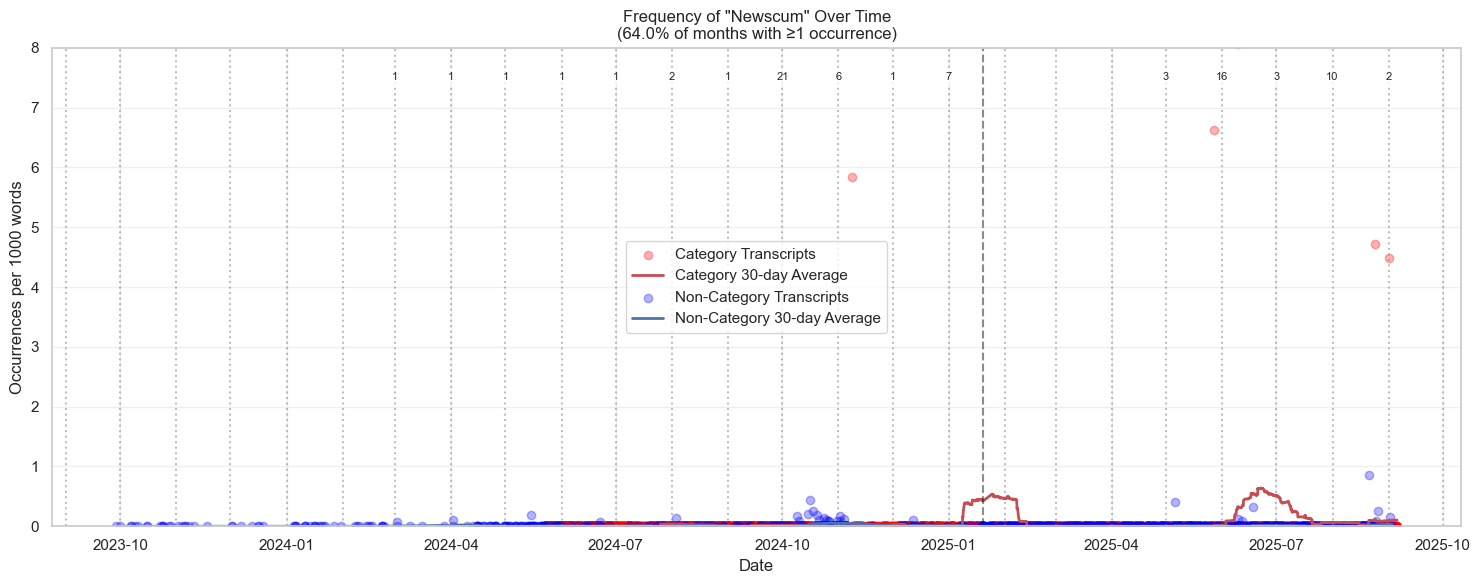

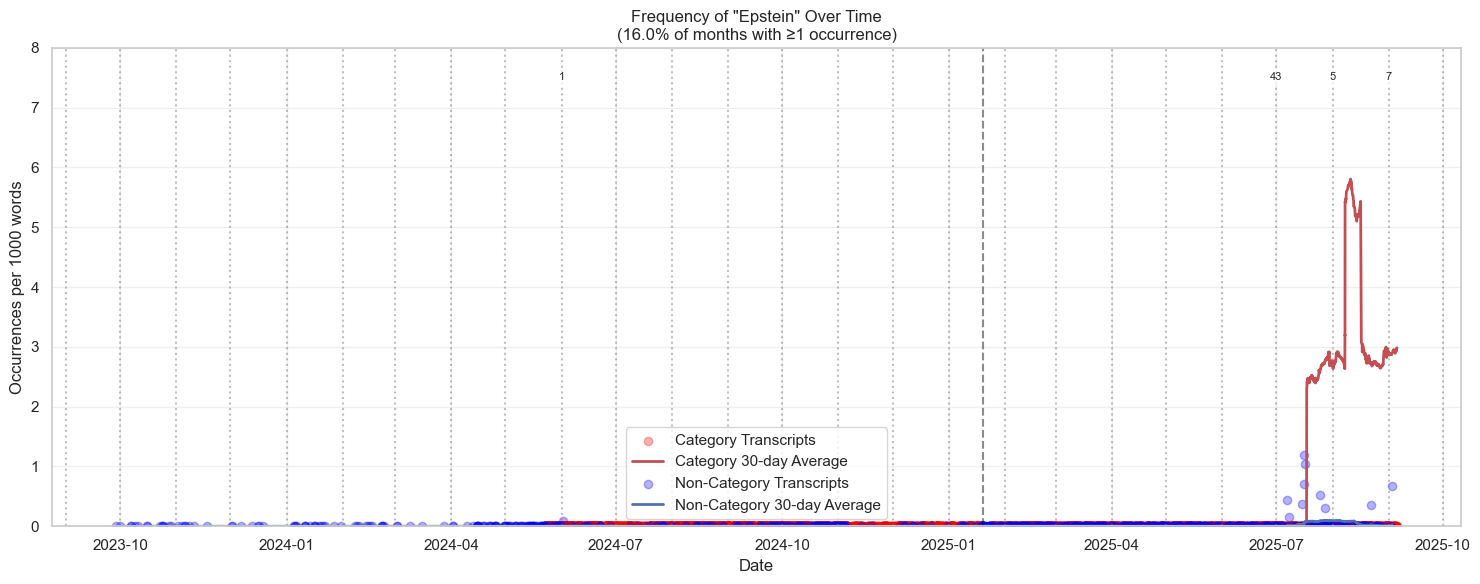

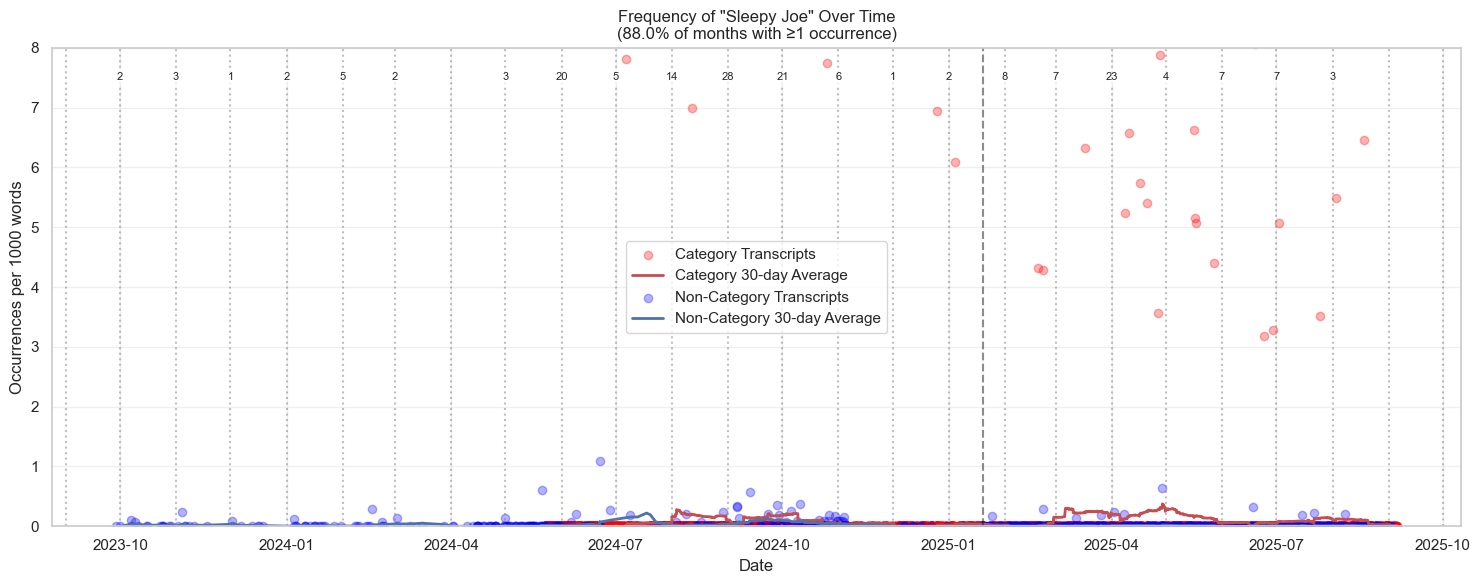

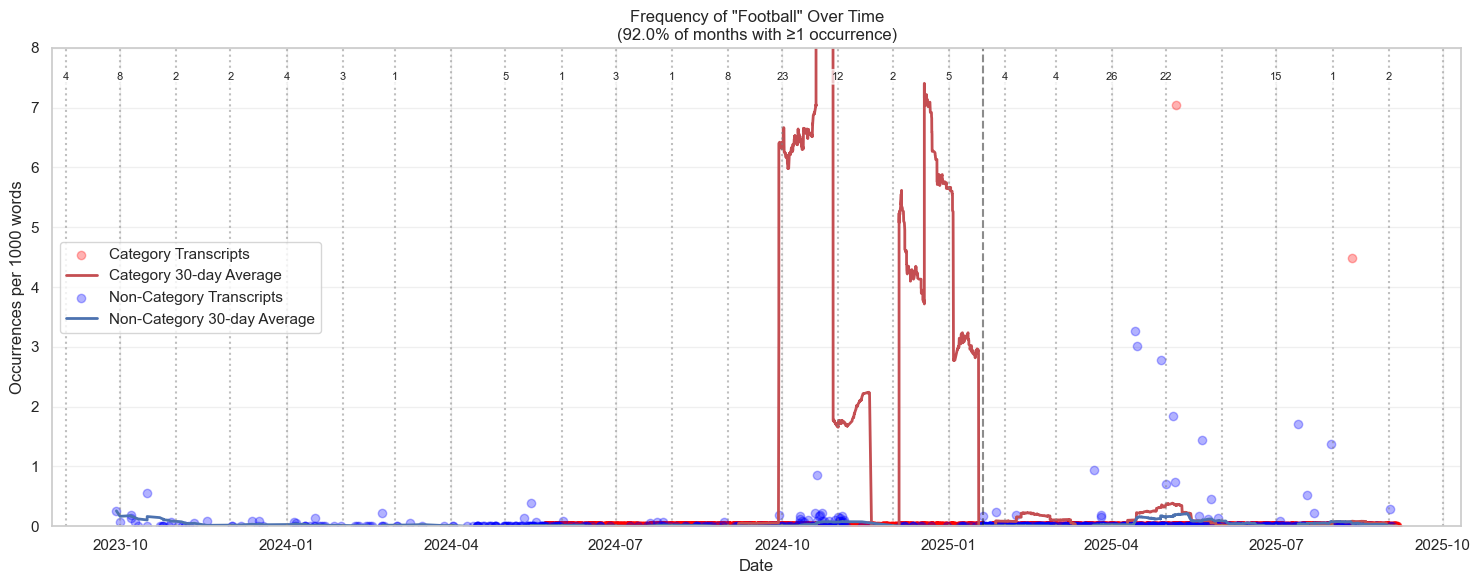

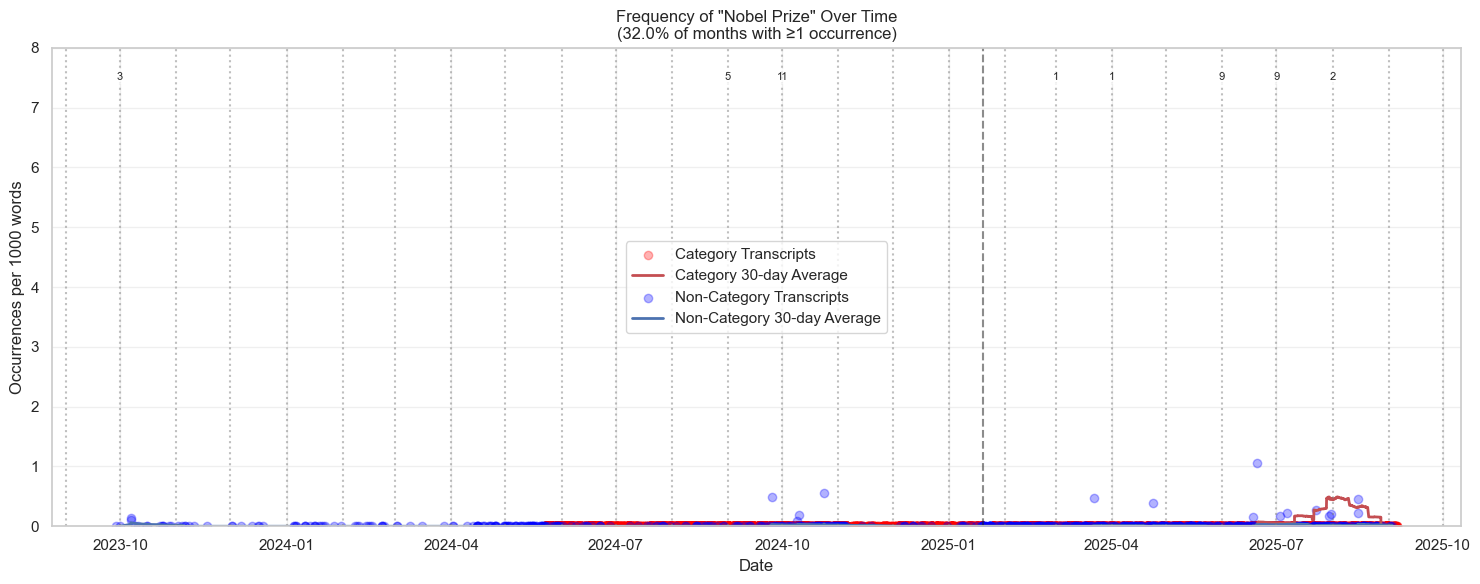

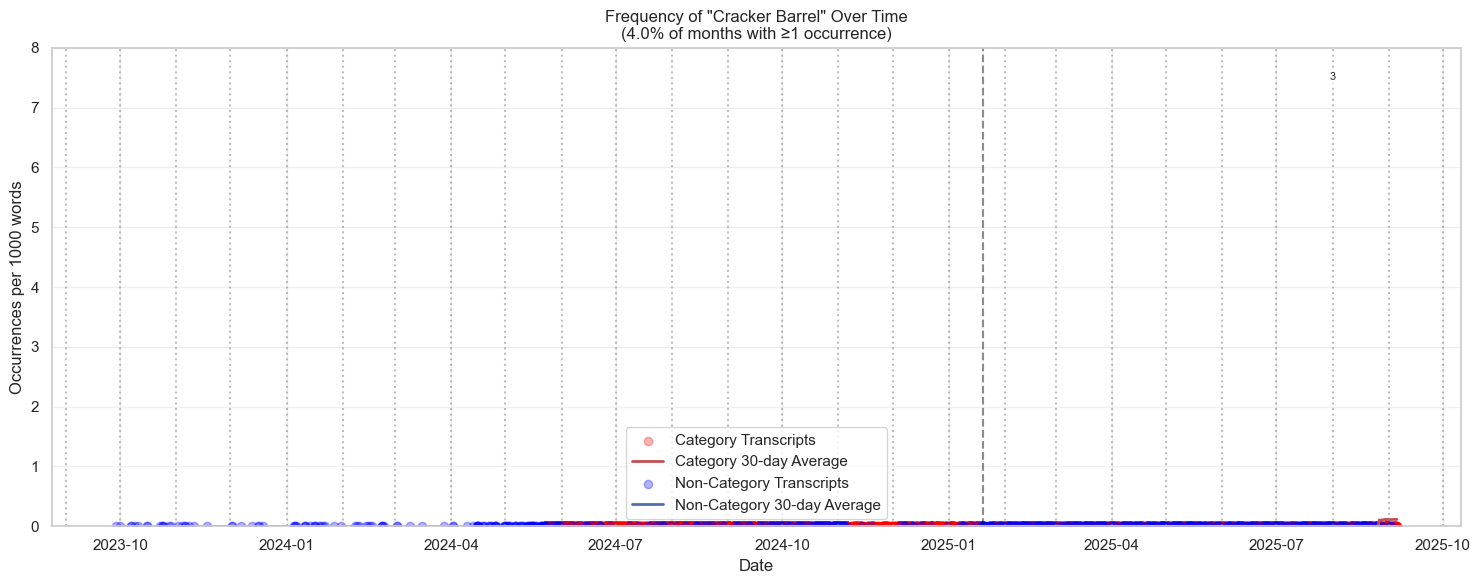

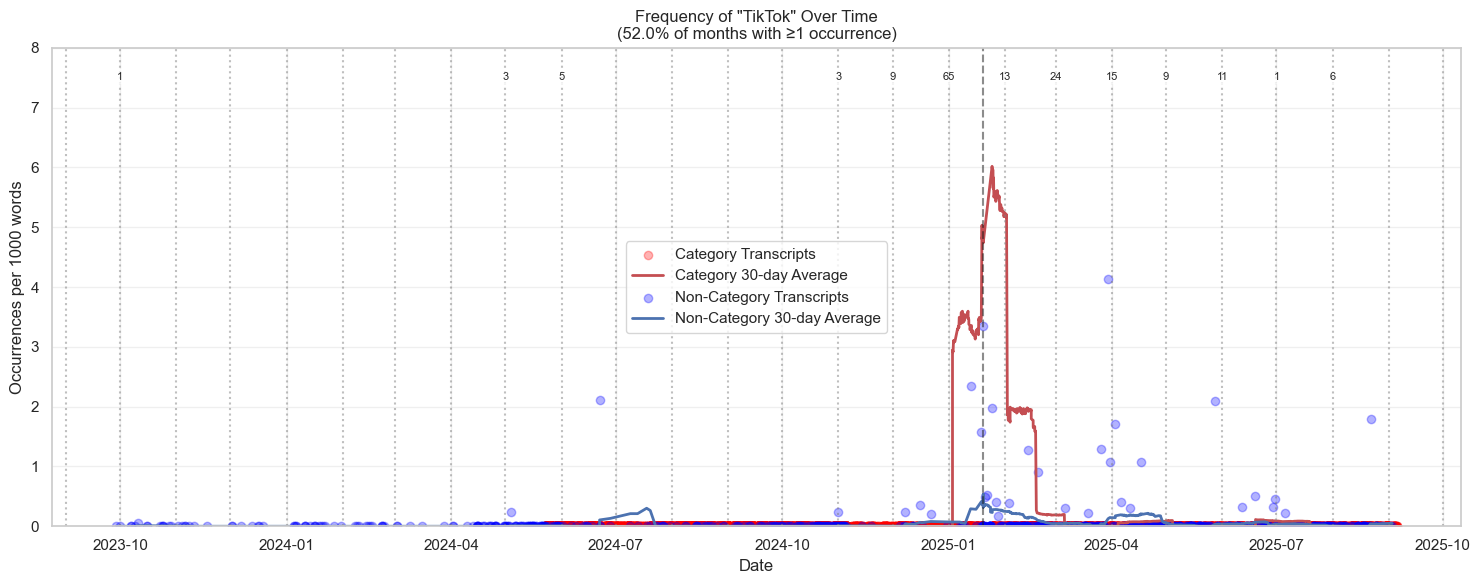

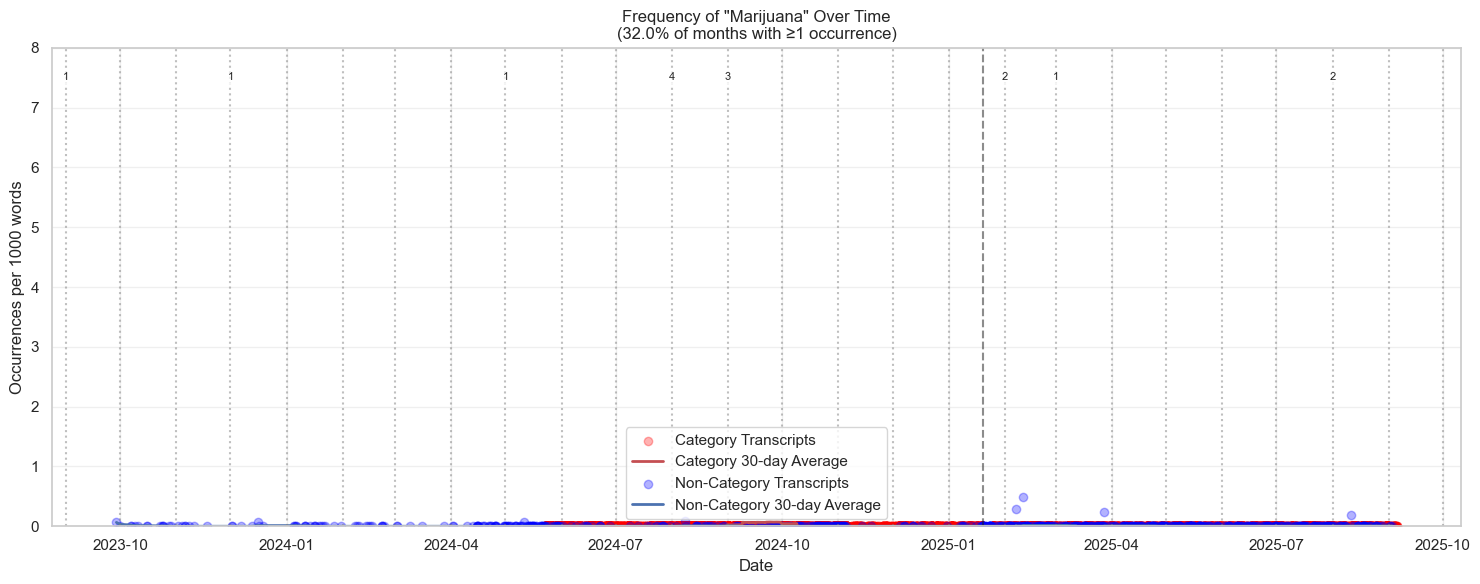

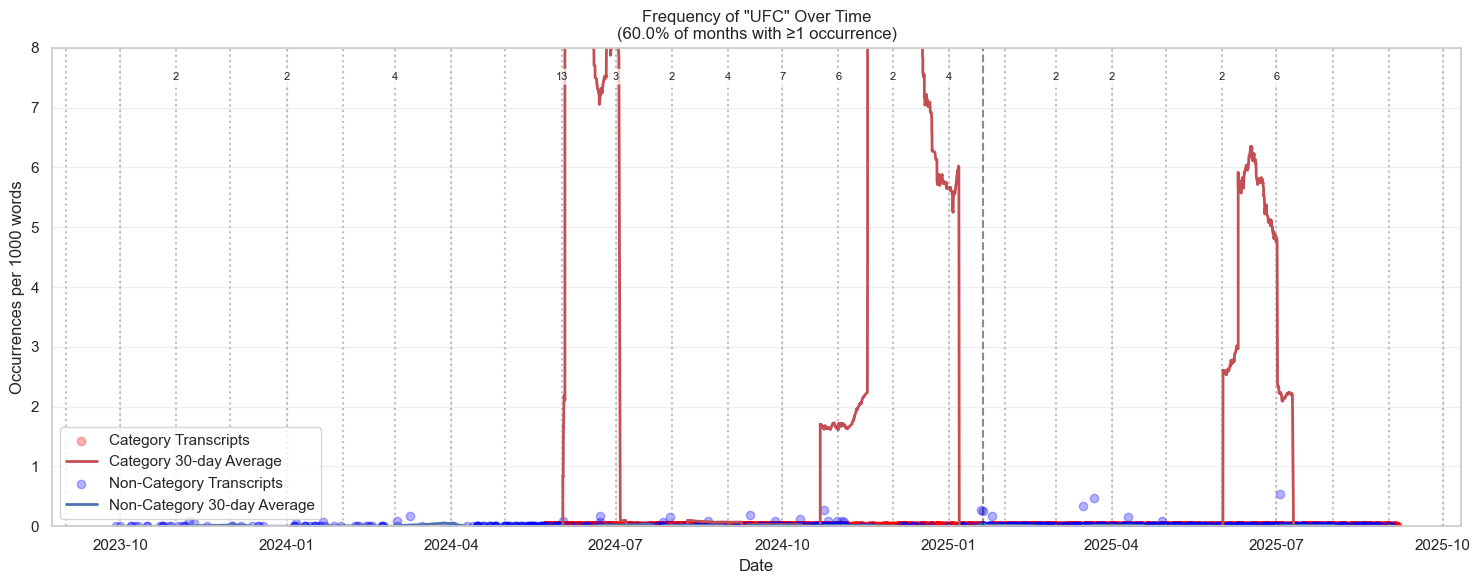

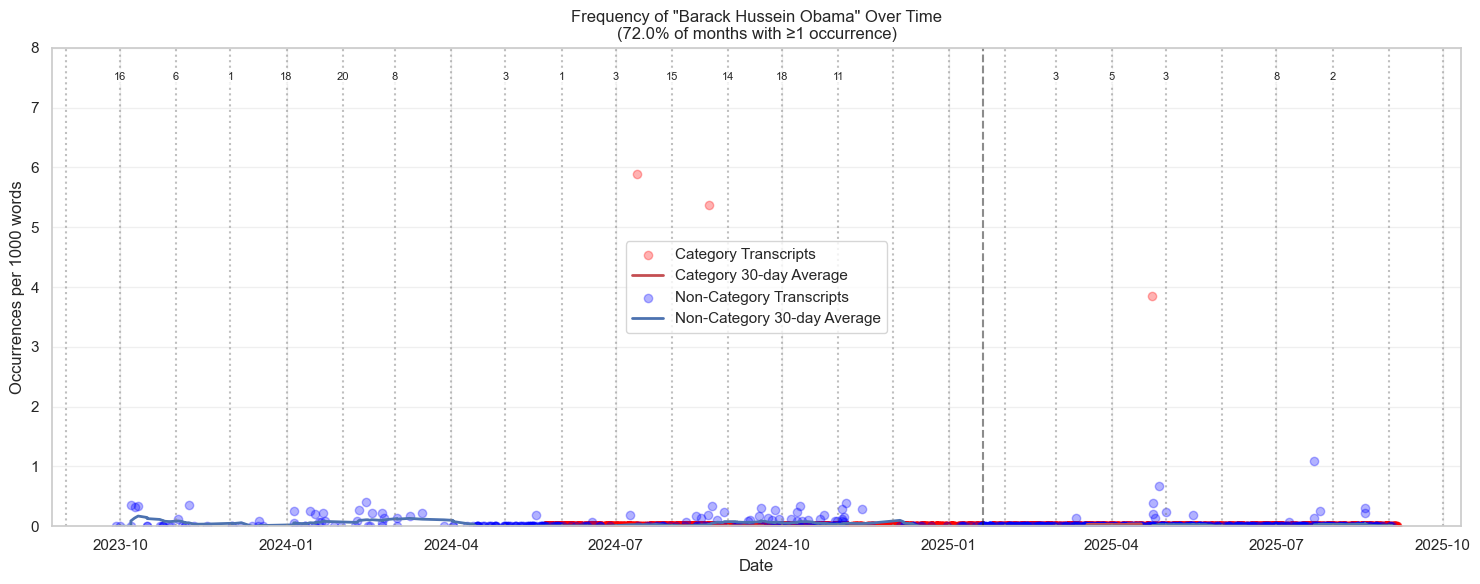

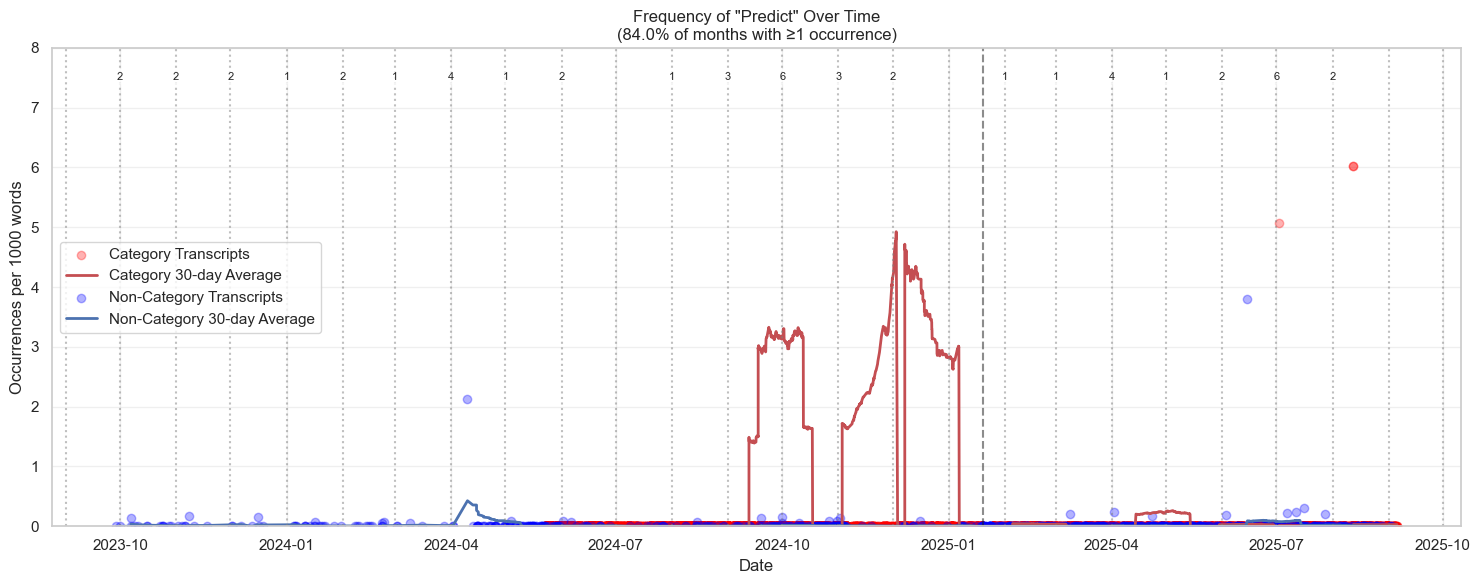

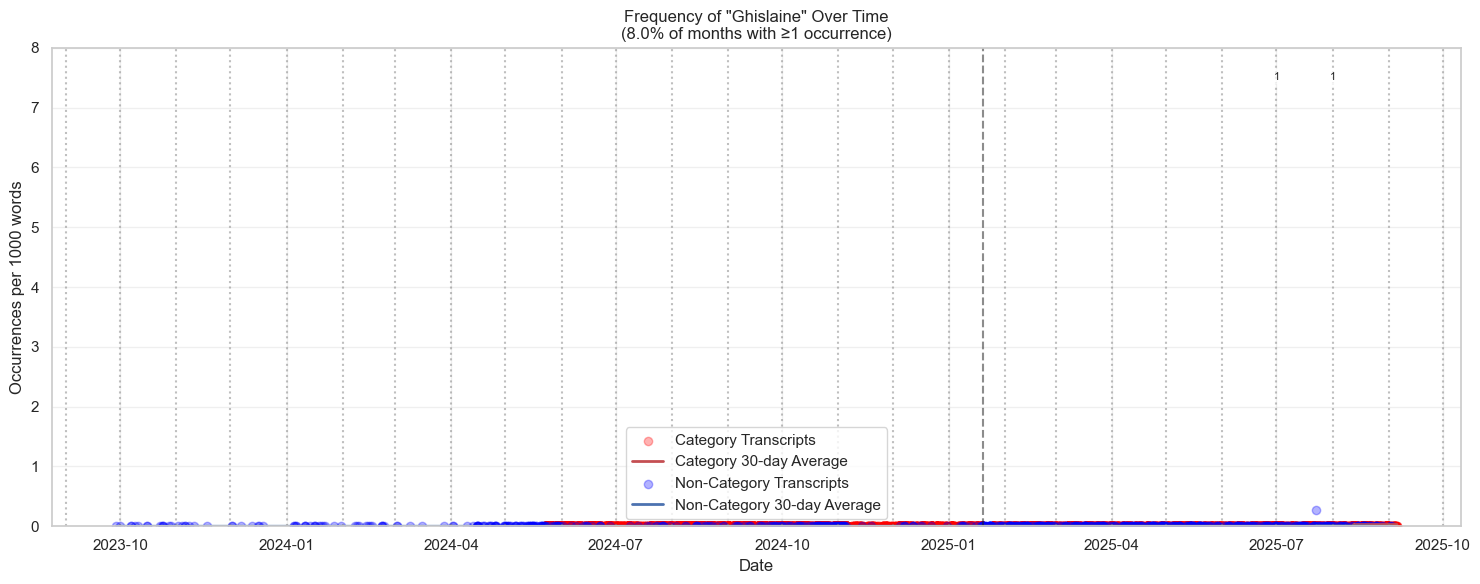

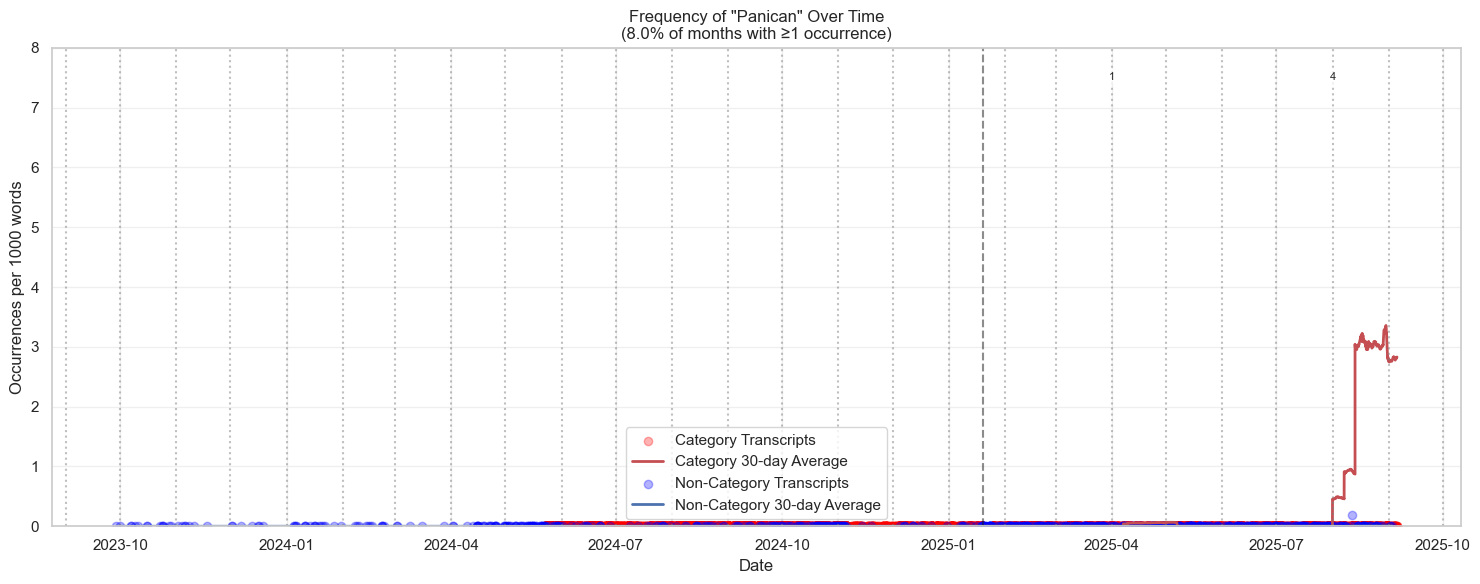

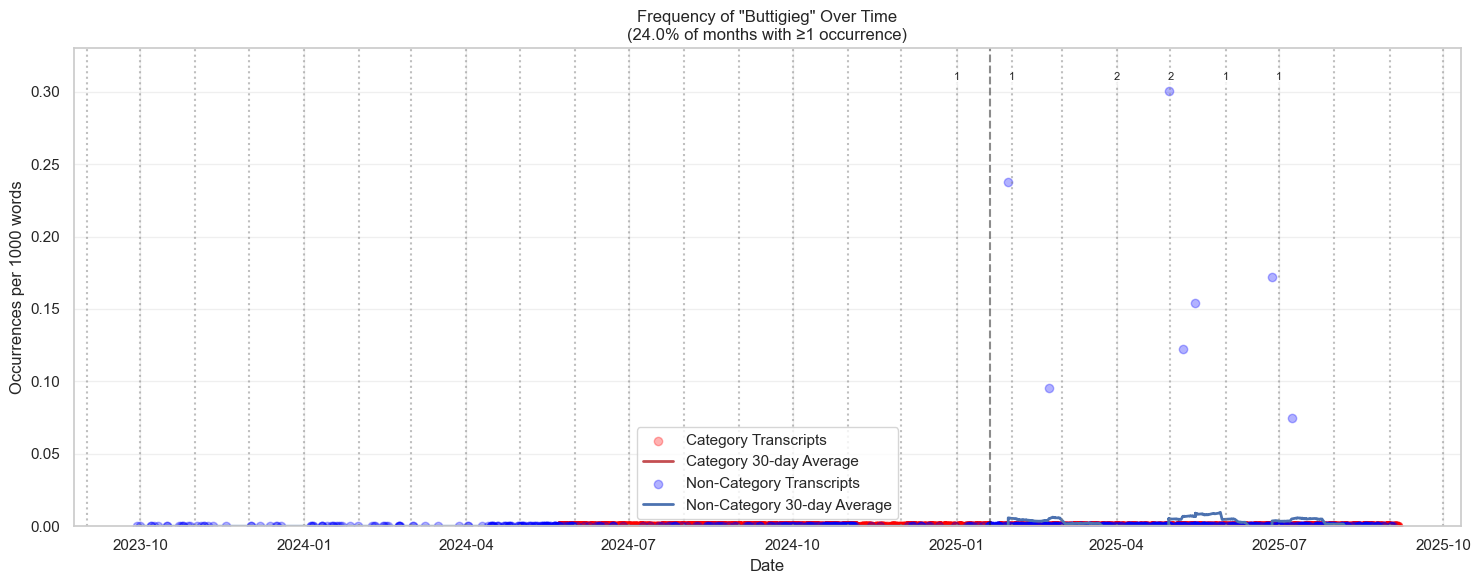

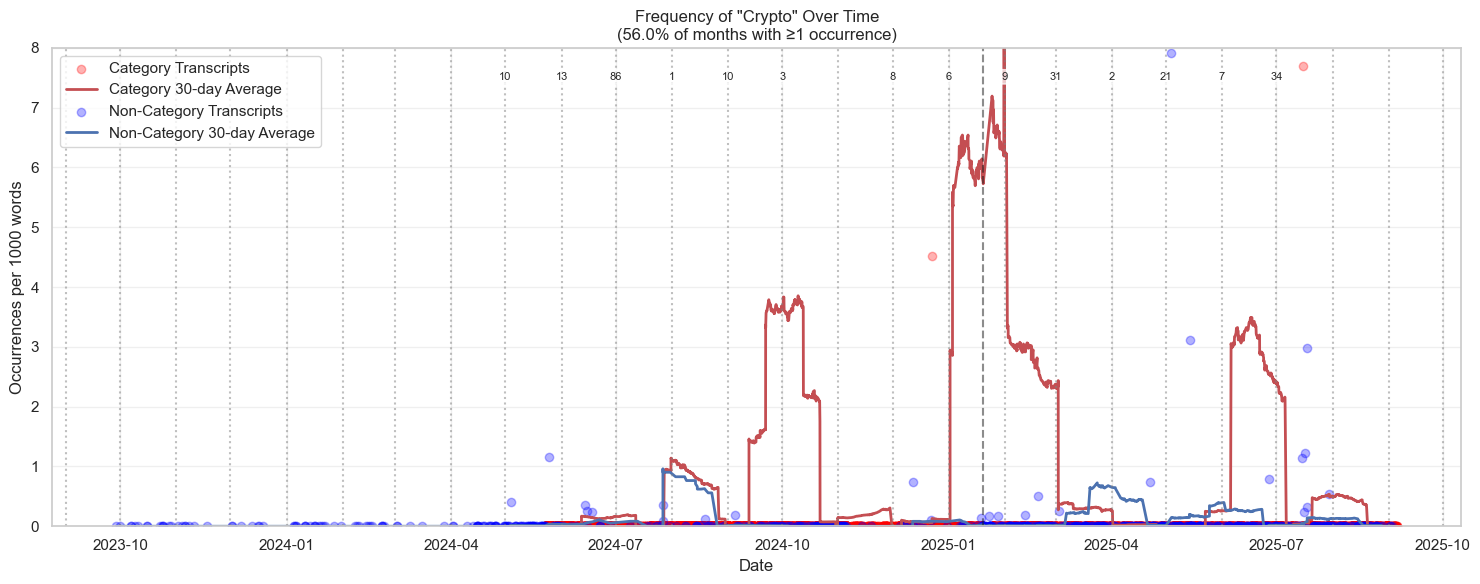

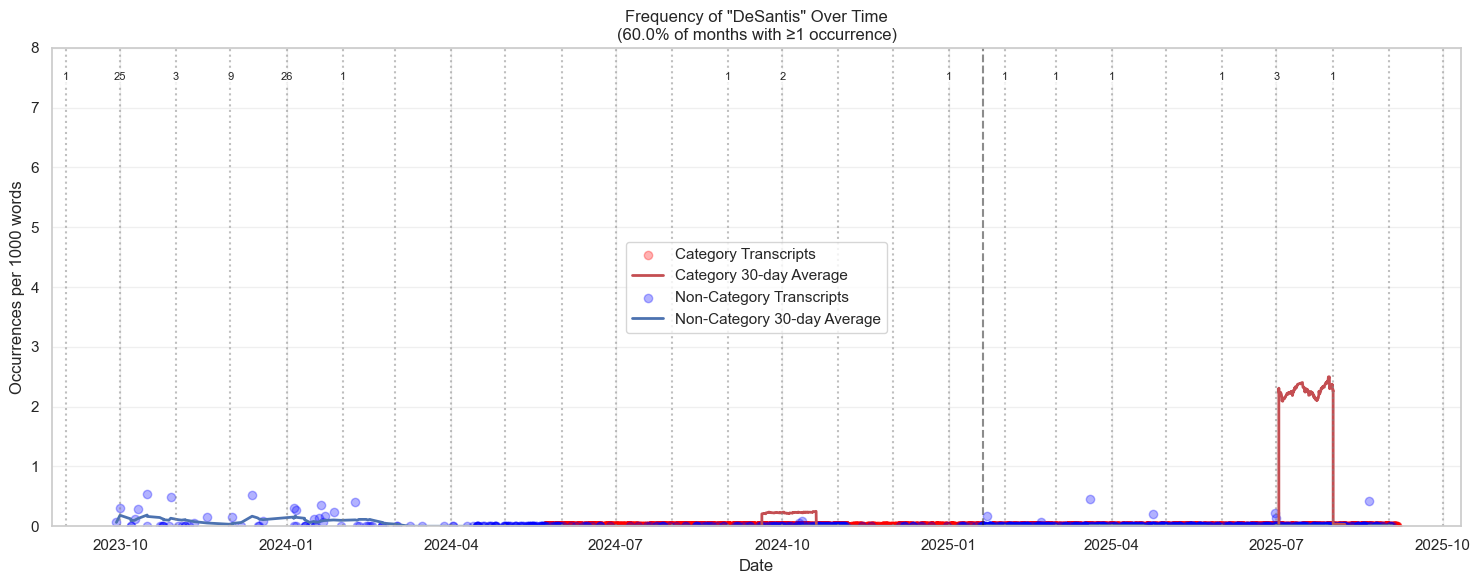

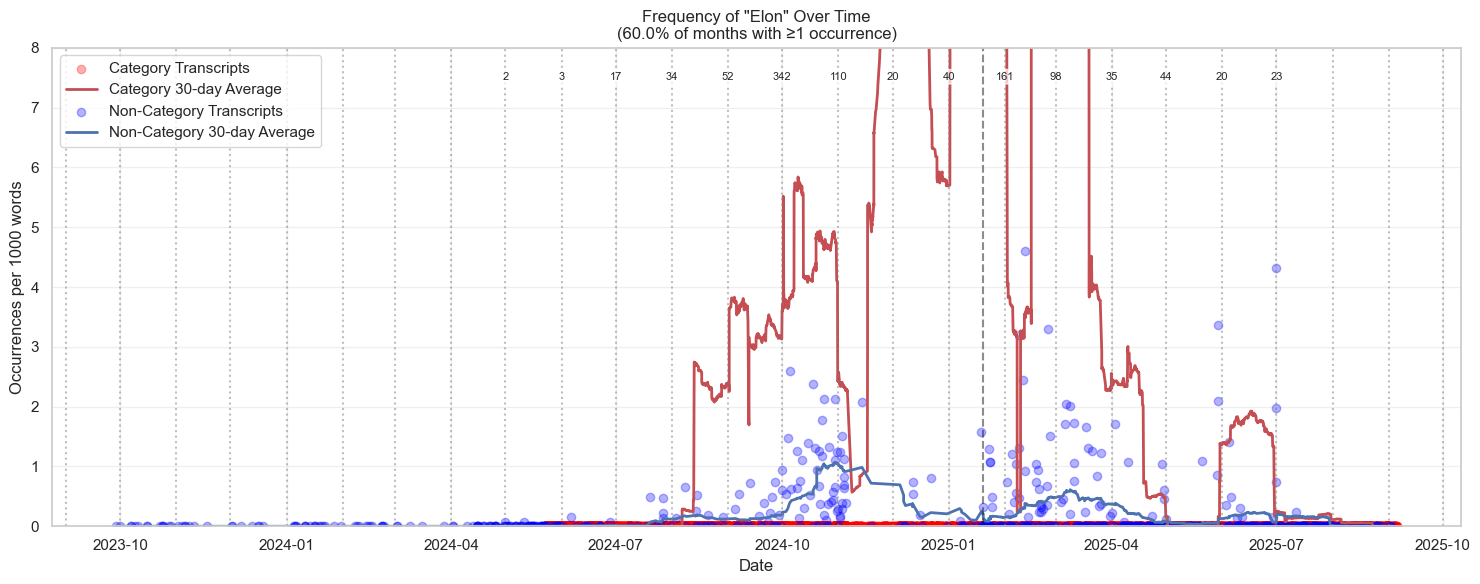

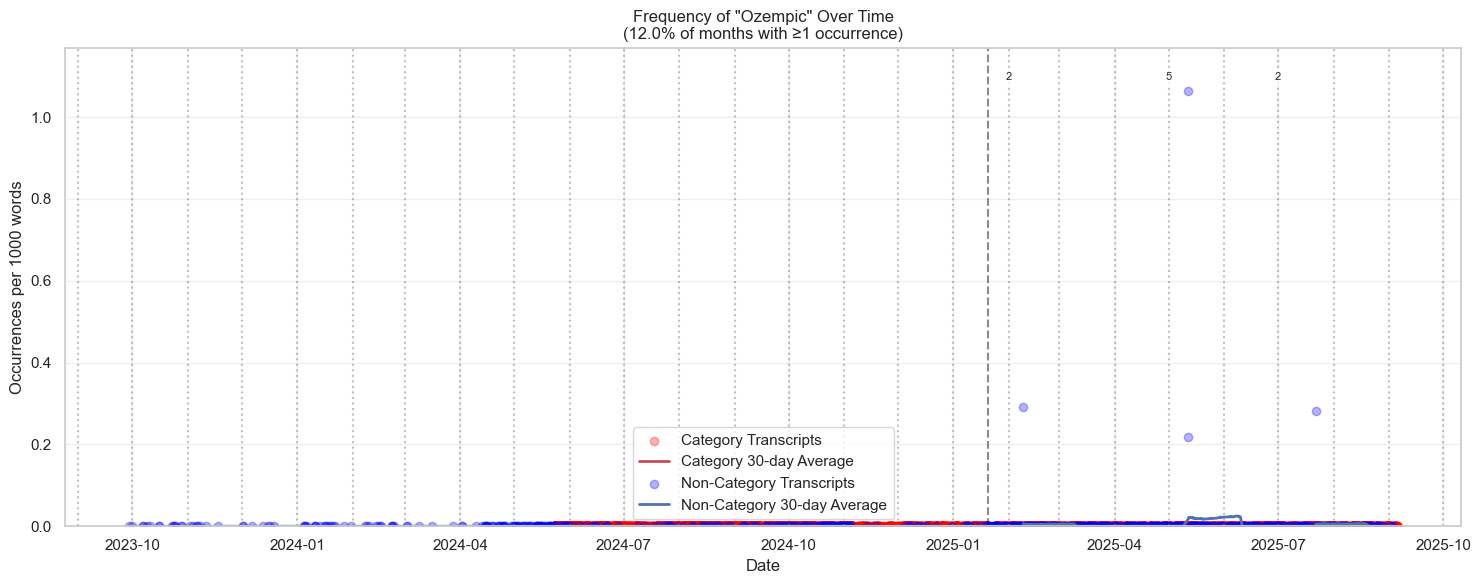

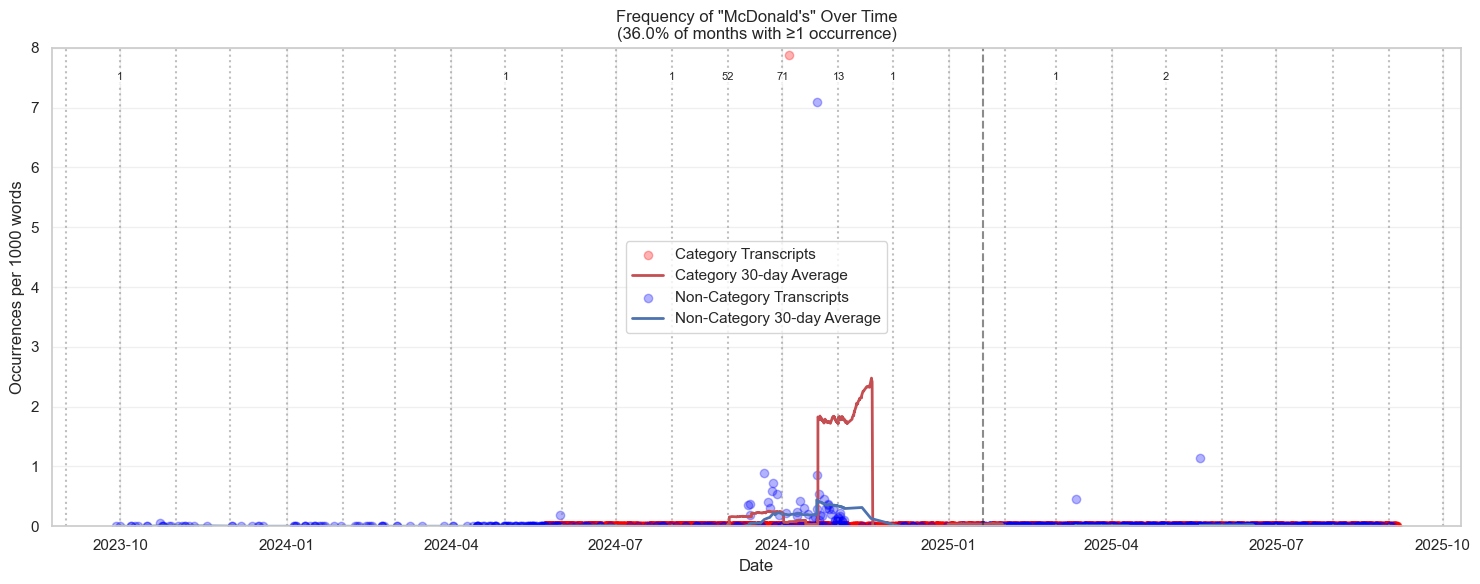

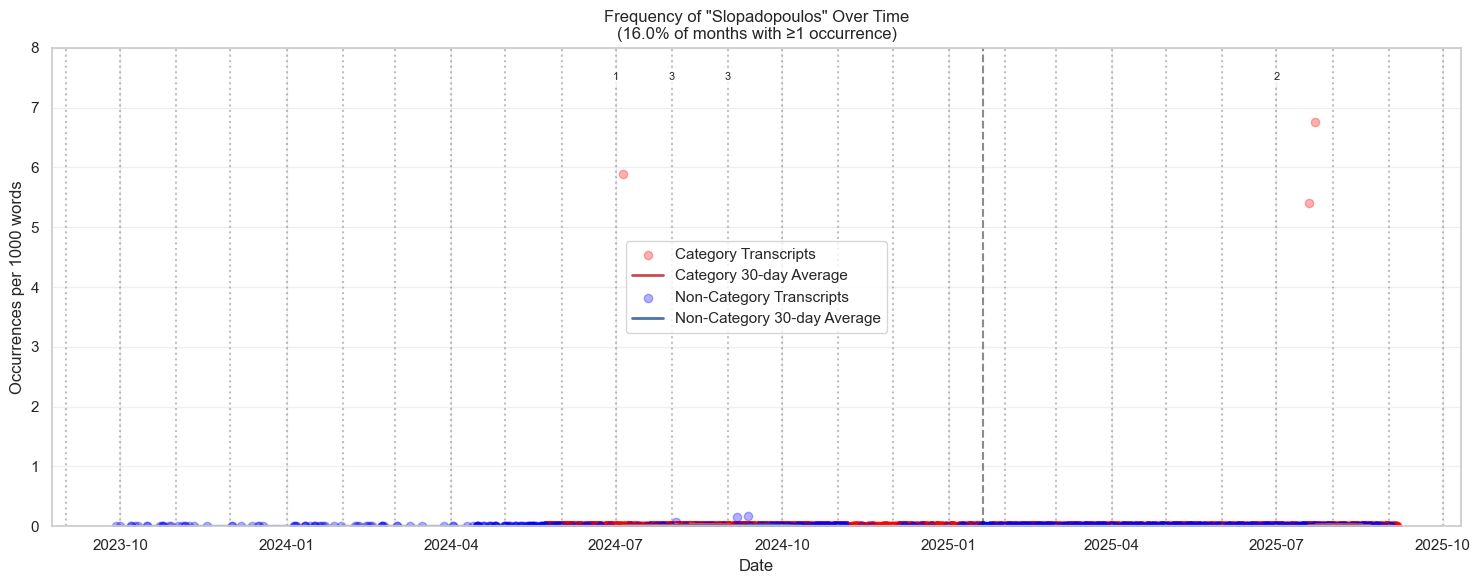

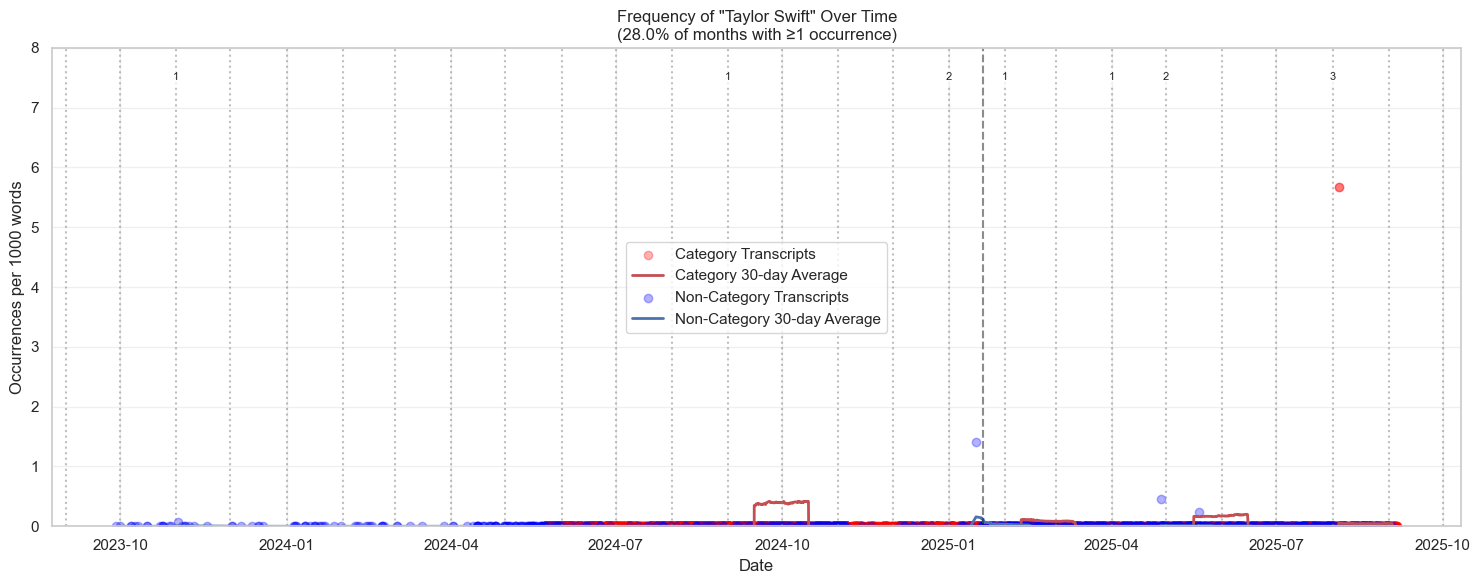

In [ ]:
def plot_phrase_frequency_over_time(df_category, df_non_category, phrase, window=30):
    """Plot the frequency of a phrase over time with separate lines for category and non-category"""
    plt.figure(figsize=(15, 6))
    
    # Process category data
    df_category = df_category.copy()
    df_category[f'{phrase}_freq'] = (df_category[phrase] / df_category['text_length']) * 1000
    category_series = df_category.set_index('date')[f'{phrase}_freq']
    category_rolling = category_series.rolling(window=f'{window}D', min_periods=1).mean()
    
    # Process non-category data
    df_non_category = df_non_category.copy()
    df_non_category[f'{phrase}_freq'] = (df_non_category[phrase] / df_non_category['text_length']) * 1000
    non_category_series = df_non_category.set_index('date')[f'{phrase}_freq']
    non_category_rolling = non_category_series.rolling(window=f'{window}D', min_periods=1).mean()
    
    # Plot category data
    plt.scatter(category_series.index, category_series.values, alpha=0.3, color='red', label='Category Transcripts')
    plt.plot(category_rolling.index, category_rolling.values, 'r-', linewidth=2, label=f'Category {window}-day Average')
    
    # Plot non-category data
    plt.scatter(non_category_series.index, non_category_series.values, alpha=0.3, color='blue', label='Non-Category Transcripts')
    plt.plot(non_category_rolling.index, non_category_rolling.values, 'b-', linewidth=2, label=f'Non-Category {window}-day Average')
    
    plt.title(f'Frequency of "{phrase}" Over Time')
    plt.xlabel('Date')
    plt.ylabel('Occurrences per 1000 words')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Add vertical line for inauguration
    plt.axvline(x=INAUGURATION_DATE, color='k', linestyle='--', alpha=0.5, label='Inauguration')
    
    # Add monthly vertical lines and counts
    combined_df = pd.concat([df_category, df_non_category])
    if not combined_df.empty:
        date_range = pd.date_range(
            start=combined_df['date'].min().replace(day=1),
            end=combined_df['date'].max() + pd.DateOffset(months=1),
            freq='MS'  # Month start
        )
        
        # Calculate monthly statistics
        combined_df['year_month'] = combined_df['date'].dt.to_period('M')
        monthly_stats = combined_df.groupby('year_month').agg({
            phrase: 'sum',
            'date': 'count'
        }).rename(columns={'date': 'transcript_count'})
        
        # Calculate % of months with 1+ occurrence
        months_with_occurrence = (monthly_stats[phrase] >= 1).sum()
        total_months = len(monthly_stats)
        pct_months_with_occurrence = (months_with_occurrence / total_months * 100) if total_months > 0 else 0
        
        # Add monthly vertical lines and counts
        for date in date_range:
            plt.axvline(x=date, color='gray', linestyle=':', alpha=0.5)
            
            # Get monthly count for this date
            period = date.to_period('M')
            if period in monthly_stats.index:
                monthly_count = monthly_stats.loc[period, phrase]
                if monthly_count > 0:
                    # Position text at top of plot
                    ymax = min(8, max(
                        df_category[f'{phrase}_freq'].max() if not df_category.empty else 0,
                        df_non_category[f'{phrase}_freq'].max() if not df_non_category.empty else 0
                    ) * 1.1)
                    plt.text(date, ymax * 0.95, str(int(monthly_count)), 
                            ha='center', va='top', fontsize=8, 
                            bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.7))
        
        # Add percentage to title
        plt.title(f'Frequency of "{phrase}" Over Time\n({pct_months_with_occurrence:.1f}% of months with ≥1 occurrence)')
    
    # Auto-adjust y-axis limit up to max of 8
    ymax = min(8, max(
        df_category[f'{phrase}_freq'].max() if not df_category.empty else 0,
        df_non_category[f'{phrase}_freq'].max() if not df_non_category.empty else 0
    ) * 1.1)  # Add 10% padding
    plt.ylim(0, ymax)
    
    plt.tight_layout()
    plt.show()

# Plot time series for all phrases, sorted by frequency
phrase_freqs = {}
for phrase in SEARCH_PHRASES.keys():
    # Calculate average frequency across all data
    category_freq = (df_category[phrase].sum() / df_category['text_length'].sum()) * 1000 if not df_category.empty and df_category['text_length'].sum() > 0 else 0
    non_category_freq = (df_non_category[phrase].sum() / df_non_category['text_length'].sum()) * 1000 if not df_non_category.empty and df_non_category['text_length'].sum() > 0 else 0
    phrase_freqs[phrase] = (category_freq + non_category_freq) / 2

for phrase in phrase_freqs:
    plot_phrase_frequency_over_time(df_category, df_non_category, phrase)

In [ ]:
# Calculate expected length from the chosen category
expected_length = df_category['text_length'].mean()
print(f"Expected length from category data: {expected_length:.0f} words")


Expected length from category data: 39 words


## Poisson Predictions

The most naive approach is to use the past frequency of a phrase over a given time period to forecast the probability of a phrase occurring during the expected length of a future speech. Using the Poisson distribution, we assume each word is independent and identically distributed. This allows us to compute threshold probabilities for a phrase occurring a given number of times, which can be compared to the prediction market's implied probability. However, this approach does not account for the clear dependence between words in a speech. This approach can still be useful for analyzing mentions where mostly independent occurrences might be expected (America, God, etc.) 

In [ ]:
def calculate_poisson_predictions(df, avg_length):
    """Calculate predictions with likelihoods using Poisson distribution"""
    predictions = []
    
    for phrase in SEARCH_PHRASES.keys():
        # Calculate rate per word
        total_occurrences = df[phrase].sum()
        total_words = df['text_length'].sum()
        rate_per_word = total_occurrences / total_words
        
        # Expected occurrences in SOTU
        expected = rate_per_word * avg_length
        
        # Calculate likelihoods using Poisson PMF
        def poisson_ge_k(lambda_, k):
            return 1 - stats.poisson.cdf(k-1, lambda_)
        
        predictions.append({
            'Phrase': phrase,
            'Expected': expected,
            'Historical Rate': rate_per_word * 1000,  # per 1000 words
            'Total Historical': total_occurrences,
            'P(≥1)': poisson_ge_k(expected, 1),
            'P(≥3)': poisson_ge_k(expected, 3),
            'P(≥4)': poisson_ge_k(expected, 4),
            'P(≥5)': poisson_ge_k(expected, 5),
            'P(≥15)': poisson_ge_k(expected, 15)
        })
    
    return pd.DataFrame(predictions)

length = 10000

# Calculate predictions from different data sources
predictions_all = calculate_poisson_predictions(df, length)
predictions_speeches = calculate_poisson_predictions(df_speech, length)
predictions_post_all = calculate_poisson_predictions(pd.concat([df_nonspeech_post, df_speech_post]), length)

# Format the tables
def format_prediction_table(df, source):
    formatted = df.copy()
    formatted = formatted.round(2)
    formatted['P(≥1)'] = formatted['P(≥1)'].apply(lambda x: f"{x:.1%}")
    formatted['P(≥3)'] = formatted['P(≥3)'].apply(lambda x: f"{x:.1%}")
    formatted['P(≥4)'] = formatted['P(≥4)'].apply(lambda x: f"{x:.1%}")
    formatted['P(≥5)'] = formatted['P(≥5)'].apply(lambda x: f"{x:.1%}")
    formatted['P(≥15)'] = formatted['P(≥15)'].apply(lambda x: f"{x:.1%}")
    
    return formatted[[
        'Phrase', 'Expected',
        'P(≥1)', 'P(≥3)', 'P(≥4)', 'P(≥5)', 'P(≥15)',
        'Historical Rate', 'Total Historical'
    ]].sort_values('Expected', ascending=False)

print("Predictions based on all appearances:")
display(format_prediction_table(predictions_all, 'all'))

print("\nPredictions based on all speeches:")
display(format_prediction_table(predictions_speeches, 'post-inauguration-speeches'))

print("\nPredictions based on all post-inauguration appearances:")
display(format_prediction_table(predictions_post_all, 'post-inauguration-all'))

NameError: name 'df_speech' is not defined

## Negative Binomial 

A more general model that accounts for overdispersion. The dispersion parameter r is estimated using the method of moments, and it controls how much extra variance there is compared to a Poisson distribution. As r approaches infinity, the negative binomial converges to a Poisson distribution (in practice we use r=100 to approximate this). Values closer to 0 indicate that the data is overdispersed.

Negative Binomial Predictions based on all appearances:


,Phrase,Expected,Dispersion (r),Sample Variance,P(≥1)
26,Border,6.09,1.50,30.82,91.2%
21,Biden,5.97,0.67,58.99,78.6%
46,Kamala,4.71,0.76,33.87,77.7%
24,Election,4.34,0.74,29.74,76.1%
15,China,4.07,1.30,16.78,84.2%
12,Energy,2.46,0.78,10.21,67.0%
8,Inflation,2.42,0.32,20.65,49.7%
39,Russia,2.38,0.69,10.65,64.2%
33,Ukraine,1.41,0.28,8.57,39.3%
23,Israel,1.30,0.10,30.18,23.2%


Negative Binomial Predictions based on category:


,Phrase,Expected,Dispersion (r),Sample Variance,P(≥1)
26,Border,5.40,0.66,49.22,77.0%
15,China,4.56,1.81,16.07,89.7%
21,Biden,4.50,3.02,11.22,93.6%
24,Election,4.44,0.86,27.45,79.0%
39,Russia,3.88,1.95,11.58,88.2%
12,Energy,2.92,0.53,18.93,63.0%
8,Inflation,2.17,0.21,24.74,39.7%
5,Nuclear,1.88,0.64,7.41,58.2%
29,Canada,1.77,0.24,14.81,40.0%
33,Ukraine,1.73,1.08,4.50,64.4%


Negative Binomial Predictions based on all appearances post inauguration:


,Phrase,Expected,Dispersion (r),Sample Variance,P(≥1)
26,Border,4.36,1.25,19.56,84.7%
15,China,3.81,1.75,12.08,86.8%
21,Biden,3.69,2.54,9.06,89.8%
24,Election,3.54,2.15,9.36,87.7%
12,Energy,2.71,1.01,9.95,73.2%
39,Russia,2.19,0.75,8.59,64.2%
8,Inflation,1.90,1.67,4.06,71.9%
3,Steel,1.69,0.12,25.42,27.9%
30,Oil,1.28,0.39,5.53,43.2%
29,Canada,1.28,0.14,13.04,27.7%



Model Comparison (Negative Binomial vs Poisson):


,Phrase,Expected,Poisson P(≥1),NB P(≥1),Δ P(≥1),Dispersion (r),Sample Variance
29,Canada,2.650,92.9%,40.0%,-52.940,0.240,14.811
8,Inflation,1.887,84.9%,39.7%,-45.114,0.208,24.739
36,Sanction,1.285,72.3%,30.4%,-41.901,0.287,2.582
5,Nuclear,2.168,88.6%,58.2%,-30.325,0.636,7.406
30,Oil,1.606,79.9%,50.2%,-29.757,0.469,7.097
32,Elon,0.924,60.3%,33.0%,-27.273,0.286,3.552
27,Autopen,0.602,45.2%,18.3%,-26.932,0.218,0.843
4,Economy,0.843,57.0%,30.6%,-26.386,0.144,20.917
16,India,0.763,53.4%,29.5%,-23.907,1.013,0.588
12,Energy,2.008,86.6%,63.0%,-23.597,0.531,18.932



Distribution comparison for Border (r = 0.66):


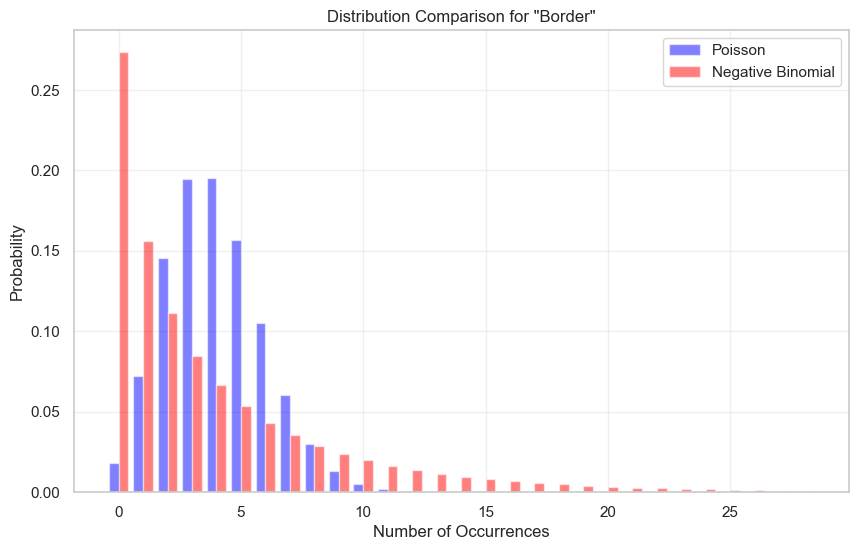

In [ ]:

def calculate_negative_binomial_predictions(df, avg_length):
    """Calculate predictions using Negative Binomial distribution"""
    predictions = []
    
    for phrase in SEARCH_PHRASES.keys():
        # Calculate rate per word and variance
        total_occurrences = df[phrase].sum()
        total_words = df['text_length'].sum()
        rate_per_word = total_occurrences / total_words
        
        # Expected occurrences in speech of avg_length
        expected = rate_per_word * avg_length
        
        # Calculate sample variance to estimate overdispersion
        counts_per_speech = df[phrase] / df['text_length'] * avg_length
        sample_variance = counts_per_speech.var()
        
        if sample_variance > expected and expected > 0:  # Check for overdispersion
            # Calculate r parameter for negative binomial using method of moments
            r = max(0.1, expected**2 / (sample_variance - expected))
            p = r/(r + expected)
        else:
            # If no overdispersion, fallback to quasi-Poisson
            r = 100
            p = r/(r + expected)
        
        # Calculate likelihoods using Negative Binomial CDF
        def nb_ge_k(r, p, k):
            return 1 - stats.nbinom.cdf(k-1, r, p)
        
        predictions.append({
            'Phrase': phrase,
            'Expected': expected,
            'Dispersion (r)': r,
            'Sample Variance': sample_variance,
            'P(≥1)': nb_ge_k(r, p, 1)
        })
    
    return pd.DataFrame(predictions)


def format_prediction_table(df):
    """Format prediction table with percentages"""
    formatted = df.copy()
    formatted = formatted.round(3)
    
    # Format probability columns as percentages
    formatted['P(≥1)'] = formatted['P(≥1)'].map('{:.1%}'.format)
    
    # Round other numeric columns
    formatted['Expected'] = formatted['Expected'].round(2)
    if 'Dispersion (r)' in formatted.columns:
        formatted['Dispersion (r)'] = formatted['Dispersion (r)'].round(2)
        formatted['Sample Variance'] = formatted['Sample Variance'].round(2)
    
    return formatted.sort_values('Expected', ascending=False)

def compare_models(poisson_df, nb_df):
    """Compare Poisson and Negative Binomial predictions"""
    comparison = pd.DataFrame()
    comparison['Phrase'] = poisson_df['Phrase']
    comparison['Expected'] = poisson_df['Expected']
    
    # Convert percentage strings back to floats for calculations
    comparison['Poisson P(≥1)'] = poisson_df['P(≥1)'].astype(float)
    comparison['NB P(≥1)'] = nb_df['P(≥1)'].astype(float)
    comparison['Δ P(≥1)'] = (comparison['NB P(≥1)'] - comparison['Poisson P(≥1)']) * 100
    
    comparison['Dispersion (r)'] = nb_df['Dispersion (r)']
    comparison['Sample Variance'] = nb_df['Sample Variance']
    
    # Format probability columns as percentages
    comparison['Poisson P(≥1)'] = comparison['Poisson P(≥1)'].map('{:.1%}'.format)
    comparison['NB P(≥1)'] = comparison['NB P(≥1)'].map('{:.1%}'.format)
    
    return comparison.round(3).sort_values('Δ P(≥1)', ascending=True)

def plot_distribution_comparison(phrase, poisson_df, nb_df, max_k=10):
    """Plot comparison of Poisson and Negative Binomial distributions"""
    phrase_data = poisson_df[poisson_df['Phrase'] == phrase].iloc[0]
    nb_data = nb_df[nb_df['Phrase'] == phrase].iloc[0]
    
    lambda_ = phrase_data['Expected']
    r = nb_data['Dispersion (r)']
    p = r/(r + lambda_)
    
    k = np.arange(0, max_k+1)
    poisson_pmf = stats.poisson.pmf(k, lambda_)
    nb_pmf = stats.nbinom.pmf(k, r, p)
    
    plt.figure(figsize=(10, 6))
    plt.bar(k-0.2, poisson_pmf, width=0.4, alpha=0.5, label='Poisson', color='blue')
    plt.bar(k+0.2, nb_pmf, width=0.4, alpha=0.5, label='Negative Binomial', color='red')
    plt.title(f'Distribution Comparison for "{phrase}"')
    plt.xlabel('Number of Occurrences')
    plt.ylabel('Probability')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

# Calculate predictions using both models
avg_speech_length = df_category['text_length'].mean()

print("Negative Binomial Predictions based on all appearances:")
nb_predictions = calculate_negative_binomial_predictions(df, avg_speech_length)
display(format_prediction_table(nb_predictions))

print("Negative Binomial Predictions based on category:")
nb_predictions = calculate_negative_binomial_predictions(df_category, avg_speech_length)
display(format_prediction_table(nb_predictions))


print("Negative Binomial Predictions based on all appearances post inauguration:")
nb_predictions_all = calculate_negative_binomial_predictions(df_post, avg_speech_length)
display(format_prediction_table(nb_predictions_all))

poisson_predictions = calculate_poisson_predictions(df_category_post, avg_speech_length)

print("\nModel Comparison (Negative Binomial vs Poisson):")
display(compare_models(poisson_predictions, nb_predictions))

# Plot distributions for most overdispersed phrases
most_overdispersed = nb_predictions[nb_predictions['Phrase'].isin(['Border', 'America', 'God', 'January 6', 'MAGA', 'LA', 'Rigged', 'Hell'])]
for _, row in most_overdispersed.iterrows():
    # Get parameters for both distributions
    phrase_data = poisson_predictions[poisson_predictions['Phrase'] == row['Phrase']].iloc[0]
    lambda_ = phrase_data['Expected']
    r = row['Dispersion (r)']
    p = r/(r + lambda_)
    
    # Find where probability becomes negligible (< 0.1%)
    k = 0
    while stats.nbinom.pmf(k, r, p) > 0.001 or stats.poisson.pmf(k, lambda_) > 0.001:
        k += 1
    
    # Ensure minimum k of 30 for 'America' to show full distribution
    if row['Phrase'] == 'America':
        k = max(k, 60)
    
    print(f"\nDistribution comparison for {row['Phrase']} (r = {row['Dispersion (r)']:.2f}):")
    plot_distribution_comparison(row['Phrase'], poisson_predictions, nb_predictions, max_k=k)

Negative Binomial Predictions based on all appearances:


,Phrase,Expected,Dispersion (r),Sample Variance,P(≥1)
26,Border,6.09,1.50,30.82,91.2%
21,Biden,5.97,0.67,58.99,78.6%
46,Kamala,4.71,0.76,33.87,77.7%
24,Election,4.34,0.74,29.74,76.1%
15,China,4.07,1.30,16.78,84.2%
12,Energy,2.46,0.78,10.21,67.0%
8,Inflation,2.42,0.32,20.65,49.7%
39,Russia,2.38,0.69,10.65,64.2%
33,Ukraine,1.41,0.28,8.57,39.3%
23,Israel,1.30,0.10,30.18,23.2%


Negative Binomial Predictions based on category:


,Phrase,Expected,Dispersion (r),Sample Variance,P(≥1)
26,Border,5.40,0.66,49.22,77.0%
15,China,4.56,1.81,16.07,89.7%
21,Biden,4.50,3.02,11.22,93.6%
24,Election,4.44,0.86,27.45,79.0%
39,Russia,3.88,1.95,11.58,88.2%
12,Energy,2.92,0.53,18.93,63.0%
8,Inflation,2.17,0.21,24.74,39.7%
5,Nuclear,1.88,0.64,7.41,58.2%
29,Canada,1.77,0.24,14.81,40.0%
33,Ukraine,1.73,1.08,4.50,64.4%


Negative Binomial Predictions based on all appearances post inauguration:


,Phrase,Expected,Dispersion (r),Sample Variance,P(≥1)
26,Border,4.36,1.25,19.56,84.7%
15,China,3.81,1.75,12.08,86.8%
21,Biden,3.69,2.54,9.06,89.8%
24,Election,3.54,2.15,9.36,87.7%
12,Energy,2.71,1.01,9.95,73.2%
39,Russia,2.19,0.75,8.59,64.2%
8,Inflation,1.90,1.67,4.06,71.9%
3,Steel,1.69,0.12,25.42,27.9%
30,Oil,1.28,0.39,5.53,43.2%
29,Canada,1.28,0.14,13.04,27.7%



Model Comparison (Negative Binomial vs Poisson):


,Phrase,Expected,Poisson P(≥1),NB P(≥1),Δ P(≥1),Dispersion (r),Sample Variance
29,Canada,2.650,92.9%,40.0%,-52.940,0.240,14.811
8,Inflation,1.887,84.9%,39.7%,-45.114,0.208,24.739
36,Sanction,1.285,72.3%,30.4%,-41.901,0.287,2.582
5,Nuclear,2.168,88.6%,58.2%,-30.325,0.636,7.406
30,Oil,1.606,79.9%,50.2%,-29.757,0.469,7.097
32,Elon,0.924,60.3%,33.0%,-27.273,0.286,3.552
27,Autopen,0.602,45.2%,18.3%,-26.932,0.218,0.843
4,Economy,0.843,57.0%,30.6%,-26.386,0.144,20.917
16,India,0.763,53.4%,29.5%,-23.907,1.013,0.588
12,Energy,2.008,86.6%,63.0%,-23.597,0.531,18.932



Distribution comparison for Border (r = 0.66):


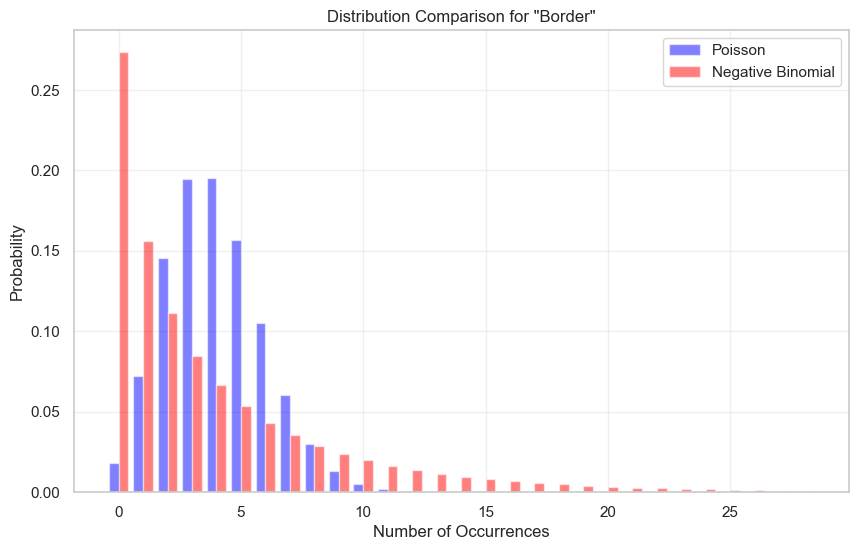

In [ ]:

def calculate_negative_binomial_predictions(df, avg_length):
    """Calculate predictions using Negative Binomial distribution"""
    predictions = []
    
    for phrase in SEARCH_PHRASES.keys():
        # Calculate rate per word and variance
        total_occurrences = df[phrase].sum()
        total_words = df['text_length'].sum()
        rate_per_word = total_occurrences / total_words
        
        # Expected occurrences in speech of avg_length
        expected = rate_per_word * avg_length
        
        # Calculate sample variance to estimate overdispersion
        counts_per_speech = df[phrase] / df['text_length'] * avg_length
        sample_variance = counts_per_speech.var()
        
        if sample_variance > expected and expected > 0:  # Check for overdispersion
            # Calculate r parameter for negative binomial using method of moments
            r = max(0.1, expected**2 / (sample_variance - expected))
            p = r/(r + expected)
        else:
            # If no overdispersion, fallback to quasi-Poisson
            r = 100
            p = r/(r + expected)
        
        # Calculate likelihoods using Negative Binomial CDF
        def nb_ge_k(r, p, k):
            return 1 - stats.nbinom.cdf(k-1, r, p)
        
        predictions.append({
            'Phrase': phrase,
            'Expected': expected,
            'Dispersion (r)': r,
            'Sample Variance': sample_variance,
            'P(≥1)': nb_ge_k(r, p, 1)
        })
    
    return pd.DataFrame(predictions)


def format_prediction_table(df):
    """Format prediction table with percentages"""
    formatted = df.copy()
    formatted = formatted.round(3)
    
    # Format probability columns as percentages
    formatted['P(≥1)'] = formatted['P(≥1)'].map('{:.1%}'.format)
    
    # Round other numeric columns
    formatted['Expected'] = formatted['Expected'].round(2)
    if 'Dispersion (r)' in formatted.columns:
        formatted['Dispersion (r)'] = formatted['Dispersion (r)'].round(2)
        formatted['Sample Variance'] = formatted['Sample Variance'].round(2)
    
    return formatted.sort_values('Expected', ascending=False)

def compare_models(poisson_df, nb_df):
    """Compare Poisson and Negative Binomial predictions"""
    comparison = pd.DataFrame()
    comparison['Phrase'] = poisson_df['Phrase']
    comparison['Expected'] = poisson_df['Expected']
    
    # Convert percentage strings back to floats for calculations
    comparison['Poisson P(≥1)'] = poisson_df['P(≥1)'].astype(float)
    comparison['NB P(≥1)'] = nb_df['P(≥1)'].astype(float)
    comparison['Δ P(≥1)'] = (comparison['NB P(≥1)'] - comparison['Poisson P(≥1)']) * 100
    
    comparison['Dispersion (r)'] = nb_df['Dispersion (r)']
    comparison['Sample Variance'] = nb_df['Sample Variance']
    
    # Format probability columns as percentages
    comparison['Poisson P(≥1)'] = comparison['Poisson P(≥1)'].map('{:.1%}'.format)
    comparison['NB P(≥1)'] = comparison['NB P(≥1)'].map('{:.1%}'.format)
    
    return comparison.round(3).sort_values('Δ P(≥1)', ascending=True)

def plot_distribution_comparison(phrase, poisson_df, nb_df, max_k=10):
    """Plot comparison of Poisson and Negative Binomial distributions"""
    phrase_data = poisson_df[poisson_df['Phrase'] == phrase].iloc[0]
    nb_data = nb_df[nb_df['Phrase'] == phrase].iloc[0]
    
    lambda_ = phrase_data['Expected']
    r = nb_data['Dispersion (r)']
    p = r/(r + lambda_)
    
    k = np.arange(0, max_k+1)
    poisson_pmf = stats.poisson.pmf(k, lambda_)
    nb_pmf = stats.nbinom.pmf(k, r, p)
    
    plt.figure(figsize=(10, 6))
    plt.bar(k-0.2, poisson_pmf, width=0.4, alpha=0.5, label='Poisson', color='blue')
    plt.bar(k+0.2, nb_pmf, width=0.4, alpha=0.5, label='Negative Binomial', color='red')
    plt.title(f'Distribution Comparison for "{phrase}"')
    plt.xlabel('Number of Occurrences')
    plt.ylabel('Probability')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

# Calculate predictions using both models
avg_speech_length = df_category['text_length'].mean()

print("Negative Binomial Predictions based on all appearances:")
nb_predictions = calculate_negative_binomial_predictions(df, avg_speech_length)
display(format_prediction_table(nb_predictions))

print("Negative Binomial Predictions based on category:")
nb_predictions = calculate_negative_binomial_predictions(df_category, avg_speech_length)
display(format_prediction_table(nb_predictions))


print("Negative Binomial Predictions based on all appearances post inauguration:")
nb_predictions_all = calculate_negative_binomial_predictions(df_post, avg_speech_length)
display(format_prediction_table(nb_predictions_all))

poisson_predictions = calculate_poisson_predictions(df_category_post, avg_speech_length)

print("\nModel Comparison (Negative Binomial vs Poisson):")
display(compare_models(poisson_predictions, nb_predictions))

# Plot distributions for most overdispersed phrases
most_overdispersed = nb_predictions[nb_predictions['Phrase'].isin(['Border', 'America', 'God', 'January 6', 'MAGA', 'LA', 'Rigged', 'Hell'])]
for _, row in most_overdispersed.iterrows():
    # Get parameters for both distributions
    phrase_data = poisson_predictions[poisson_predictions['Phrase'] == row['Phrase']].iloc[0]
    lambda_ = phrase_data['Expected']
    r = row['Dispersion (r)']
    p = r/(r + lambda_)
    
    # Find where probability becomes negligible (< 0.1%)
    k = 0
    while stats.nbinom.pmf(k, r, p) > 0.001 or stats.poisson.pmf(k, lambda_) > 0.001:
        k += 1
    
    # Ensure minimum k of 30 for 'America' to show full distribution
    if row['Phrase'] == 'America':
        k = max(k, 60)
    
    print(f"\nDistribution comparison for {row['Phrase']} (r = {row['Dispersion (r)']:.2f}):")
    plot_distribution_comparison(row['Phrase'], poisson_predictions, nb_predictions, max_k=k)

## Recent Usage in context

In [ ]:
def get_recent_contexts(df, phrase, n=20):
    """Get the n most recent contexts for a phrase"""
    # Create a list to store matches with their dates
    all_matches = []
    
    # Look through speeches from newest to oldest
    for _, row in df.sort_values('date', ascending=False).iterrows():
        matches = find_phrase_context(row['text'], SEARCH_PHRASES[phrase])
        for match in matches:
            all_matches.append({
                'date': row['date'],
                'category': row['category'],
                'context': match
            })
        if len(all_matches) >= n:
            break
    
    return pd.DataFrame(all_matches[:n])

# Get recent contexts for each phrase
for phrase in SEARCH_PHRASES.keys():
    contexts = get_recent_contexts(df, phrase)
    if not contexts.empty:
        print(f"\n=== Recent usage of '{phrase}' ===\n")
        for _, row in contexts.iterrows():
            print(f"Date: {row['date'].strftime('%Y-%m-%d')} ({row['category']})")
            print(f"Context: {row['context']}\n")


=== Recent usage of 'Melania' ===

Date: 2025-08-26 (remarks)
Context: ...oon to start. Some of them have started. This one has actually started. That's in the great state of Louisiana.

But the first lady is working very hard on this, and it's an important initiative. And Melania, when she puts her mind to it, nobody could do better. There's nobody. So every young person should go to AI.gov to learn more, AI.gov to learn more. And you'll see it's a great challenge. I think it'...

Date: 2025-08-19 (interview)
Context: ...his was started by Joe Biden. This was a war that should've never happened. Millions of people are dead, the country's blown to pieces, Ukraine. And it's a -- it's a shame. You know, my wife wrote -- Melania wrote that beautiful, uh, note to President Putin about children. The children are devastated, they're taken away from their homes, the whole thing.

And this is a war that would've never, ever, ever...

Date: 2025-08-19 (interview)
Context: ...friendly. Okay.

I

In [ ]:
# Get last 20 occurrences of "Clean Beautiful Coal"
clean_coal_contexts = get_recent_contexts(df, 'Clean Beautiful Coal', n=20)
if not clean_coal_contexts.empty:
    print(f"=== Last 20 occurrences of 'Clean Beautiful Coal' ===\n")
    for i, row in clean_coal_contexts.iterrows():
        print(f"{i+1}. Date: {row['date'].strftime('%Y-%m-%d')} ({row['category']})")
        print(f"   Context: {row['context']}\n")
else:
    print("No occurrences of 'Clean Beautiful Coal' found in the data.")


=== Last 20 occurrences of 'Clean Beautiful Coal' ===

1. Date: 2025-07-23 (speech)
   Context: ...d and unchecked. And what the hell were they thinking? What they've done to our country is so sad. And we can never forget it. But we're unleashing all forms of energy, including natural gas, oil and clean, beautiful coal.

I instructed my people, in the form of Chris and Doug in particular, you are not allowed to say the word coal without saying clean beautiful in front of it.  You can only say clean, beautiful coal....

2. Date: 2025-07-23 (speech)
   Context: ... clean, beautiful coal.

I instructed my people, in the form of Chris and Doug in particular, you are not allowed to say the word coal without saying clean beautiful in front of it.  You can only say clean, beautiful coal. It's a little embarrassing because we had somebody making a speech the other day, right? And he mentioned the word coal about 30 times, because that was the subject.

And he kept going clean, beauti...

3. Da

## Per-Speech Frequencies


/var/folders/_t/ds12gpdx0qb6km94c759_z9m0000gn/T/ipykernel_5752/1107231187.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


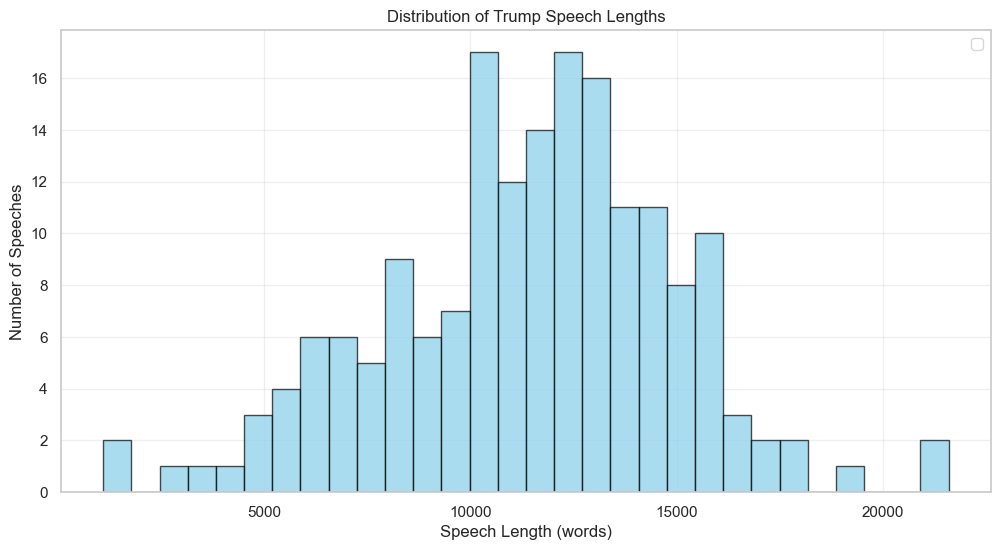

In [ ]:

# Plot distribution of speech lengths with SOTU average marked
plt.figure(figsize=(12, 6))
plt.hist(df_speech['text_length'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.xlabel('Speech Length (words)')
plt.ylabel('Number of Speeches')
plt.title('Distribution of Trump Speech Lengths')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


In [ ]:
# Calculate percentage of appearances containing each phrase at least once
phrase_percentages = {}
for phrase in SEARCH_PHRASES.keys():
    all_pct = (df[phrase] >= 1).mean() * 100
    speech_pct = (df_speech[phrase] >= 1).mean() * 100
    post_pct = (df_post[phrase] >= 1).mean() * 100
    phrase_percentages[phrase] = {
        'All Appearances': all_pct,
        'Speeches Only': speech_pct, 
        'Post-Inauguration': post_pct
    }

# Create DataFrame and sort by percentage in all appearances
phrase_df = pd.DataFrame.from_dict(phrase_percentages, orient='index')
phrase_df = phrase_df.sort_values('All Appearances', ascending=False)
phrase_df.index.name = 'Phrase'

# Format table for display
styled_df = phrase_df.style.format({
    'All Appearances': '{:.1f}%'.format,
    'Speeches Only': '{:.1f}%'.format,
    'Post-Inauguration': '{:.1f}%'.format
})

print("Percentage of Appearances Containing Each Phrase:")
display(styled_df)


Percentage of Appearances Containing Each Phrase:


,All Appearances,Speeches Only,Post-Inauguration
Phrase,,,
Biden,72.4%,97.2%,61.9%
Election,67.3%,100.0%,48.6%
Border,60.6%,98.3%,48.2%
China,59.9%,95.5%,52.5%
Russia,57.9%,89.8%,50.7%
Ukraine,54.0%,87.6%,45.3%
Inflation,53.1%,93.2%,34.9%
Economy,47.5%,89.8%,28.4%
Energy,47.5%,90.4%,32.7%


In [ ]:
def create_frequency_comparison(df, df_speech, df_post):
    """Create a comparison table of per-speech frequencies across datasets"""
    results = []
    
    for phrase in SEARCH_PHRASES.keys():
        result = {
            'Phrase': phrase,
            'All Data P(≥1)': (df[phrase] >= 1).mean(),
            'All Speeches P(≥1)': (df_speech[phrase] >= 1).mean(),
            'Post-Inauguration P(≥1)': (df_post[phrase] >= 1).mean(),
            'All Data n': len(df),
            'All Speeches n': len(df_speech),
            'Post-Inauguration n': len(df_post)
        }
        results.append(result)
    
    comparison_df = pd.DataFrame(results)
    
    # Format percentages
    for col in ['All Data P(≥1)', 'All Speeches P(≥1)', 'Post-Inauguration P(≥1)']:
        comparison_df[col] = comparison_df[col].map('{:.1%}'.format)
    
    # Sort by All Data frequency
    comparison_df = comparison_df.sort_values('All Data P(≥1)', ascending=False)
    
    return comparison_df

print("Comparison of Per-Speech Frequencies (P(≥1)):")
comparison_table = create_frequency_comparison(df, df_speech, df_post)
display(comparison_table)

# ... existing code ...

Comparison of Per-Speech Frequencies (P(≥1)):


,Phrase,All Data P(≥1),All Speeches P(≥1),Post-Inauguration P(≥1),All Data n,All Speeches n,Post-Inauguration n
44,Sleepy Joe,9.2%,26.0%,2.9%,554,177,278
18,Genius,8.7%,18.1%,6.1%,554,177,278
21,Biden,72.4%,97.2%,61.9%,554,177,278
7,Jobs Numbers,7.0%,18.6%,0.0%,554,177,278
24,Election,67.3%,100.0%,48.6%,554,177,278
26,Border,60.6%,98.3%,48.2%,554,177,278
47,MIT,6.5%,18.6%,1.4%,554,177,278
1,Fed,6.3%,6.8%,6.5%,554,177,278
9,Too Late,6.0%,11.3%,5.0%,554,177,278
15,China,59.9%,95.5%,52.5%,554,177,278
